# Используем функцию read_table() #

Также вам известно, что, указав определенные значения параметров функции read_csv(), можно считать данные из файла, в котором используется разделитель данных, отличный от запятой (sep), вместо десятичной точки используется другой символ (decimal), а также при считывании должно быть пропущено некоторое количество строк (skiprows). 

Такие данные обычно хранятся в текстовых файлах с расширением TXT. Этот тип файлов — источник данных, который легко расшифровывать и интерпретировать. Для чтения данных из файлов такого типа Pandas, помимо функции read_csv(), предлагает и функцию read_table().

Функция read_csv(), как вы уже знаете, загружает данные с разделителями из файла, URL-адреса, и в качестве разделителя по умолчанию используется запятая (символ). В документации эта функция описана как «Чтение данных из файла значений, разделённых запятыми (CSV), в DataFrame».
Функция read_table() также загружает данные с разделителями из файла, URL-адреса, но в качестве разделителя по умолчанию используется символ табуляции ('\t'). В документации эта функция описана как «Чтение данных из файла значений с разделителями в DataFrame».
Данные функции используются похожим образом, и то, что в настоящий момент поддерживаются они обе, обусловлено тем, что многие пользователи продолжают использовать функцию read_table(). Так, например, поиск на GitHub даёт более пятидесяти тысяч результатов по запросу "pd.read_table".

Для демонстрации использования функции read_table() выполним следующее: 

используя  функцию read_csv(), считаем данные из файла countries.csv в переменную countries_data, создав объект DataFrame;
используя уже знакомую функцию to_csv(), выгрузим этот DataFrame в файл countries.txt (с расширением TXT), который сохраним в папке data. В качестве разделителя используется символ пробела (" ").

In [3]:
# Импорт библиотеки pandas — при выполнении последовательно всех примеров ниже
# импорт выполняется один раз
import pandas as pd 
# Загружаем данные из файла в переменную, создавая объект DataFrame
countries_data = pd.read_csv('data/countries.csv', sep=';') 
# Выгружаем данные из DataFrame в CSV-файл и сохраняем файл в папке data
countries_data.to_csv('data/countries.txt', index=False, sep=' ')

Считаем данные из файла countries.txt в переменную txt_df  (объект DataFrame), применив функцию read_table() с параметрами sep=' '  и  index_col=['country'] (так мы избавимся от столбца с индексом и присвоим названия строкам, используя данные одного из столбцов). Выводим на экран полученный результат:

In [4]:
# Загружаем данные из файла в переменную, создавая объект DataFrame
txt_df = pd.read_table('data/countries.txt', sep=' ', index_col=['country'])
# Выводим содержимое DataFrame на экран
display(txt_df)

population    square
country                        
Англия          56.29    133396
Канада          38.05   9984670
США            322.28   9826630
Россия         146.24  17125191
Украина         45.50    603628
Беларусь         9.50    207600
Казахстан       17.04   2724902

# Применение параметра header #

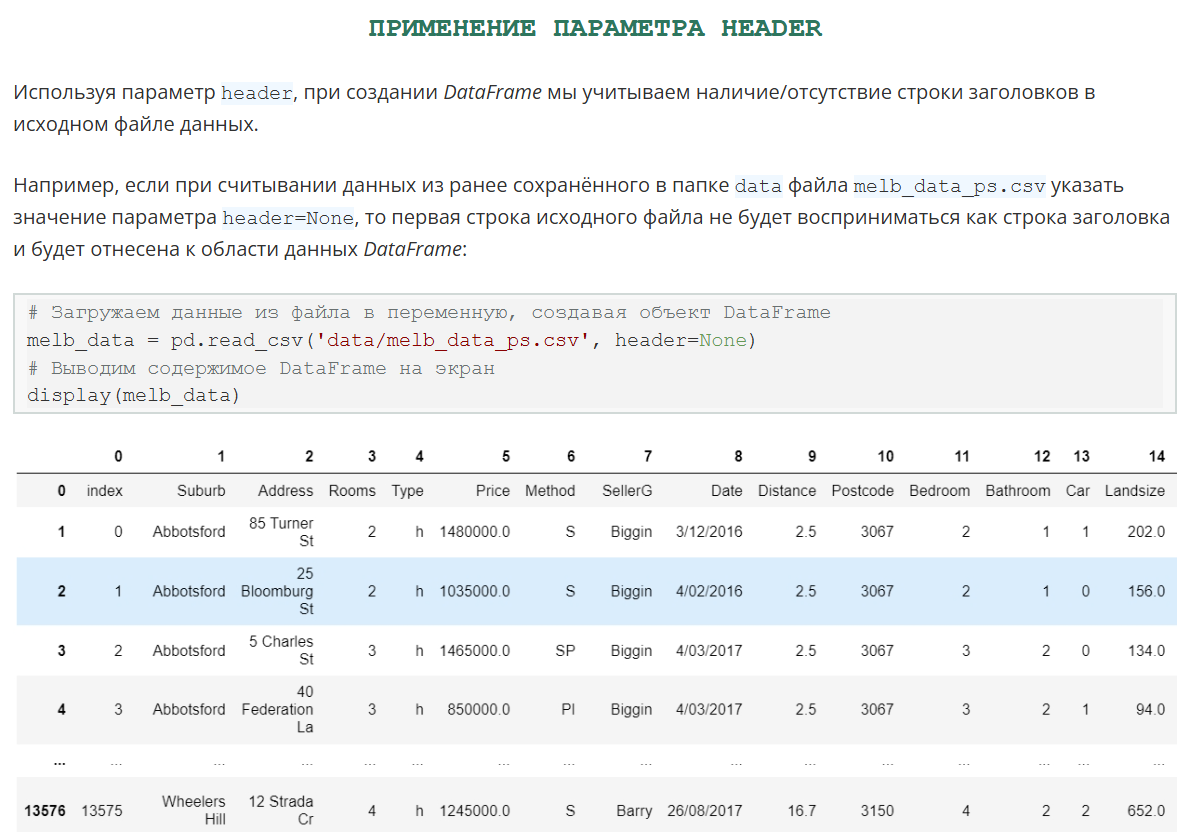

# Решаем проблему с кодировкой исходных данных #

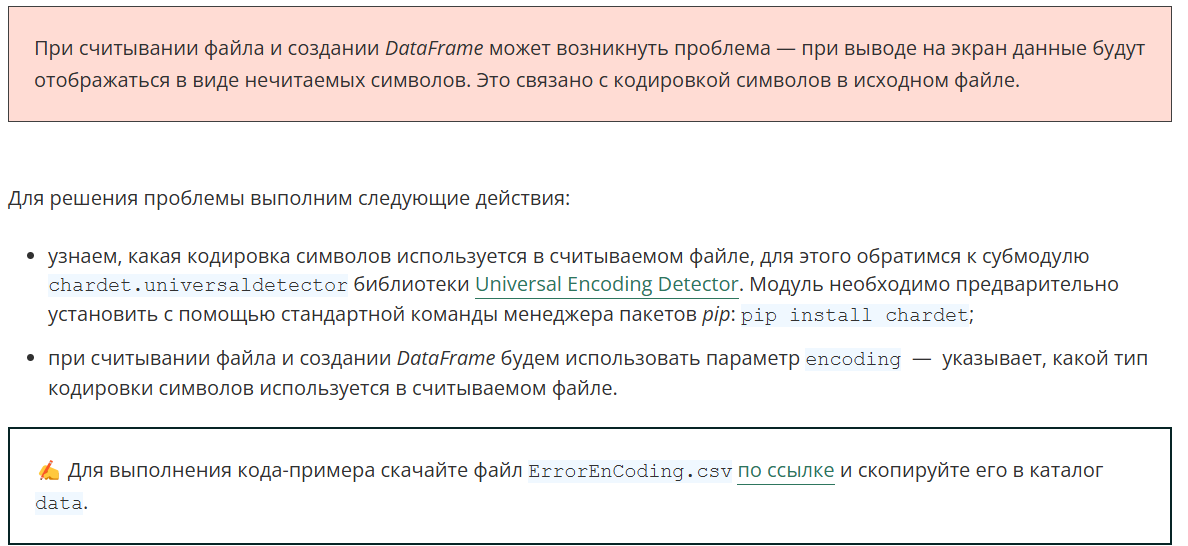

In [5]:
# Считываем данные из файла с неизвестной кодировкой в переменную, создавая объект DataFrame
data=pd.read_csv('data/ErrorEnCoding.csv', header=None, encoding_errors='replace') 
# Выводим содержимое DataFrame на экран
display(data)

0                           1             2
0   User_943         Accumanst@gmail.com         ������
1   User_908           Advismowr@mail.ru         ������
2   User_962             Anachso@ukr.net      ���������
3   User_973            Antecia@inbox.ru          �����
4   User_902          Balliaryva@ukr.net               
..        ...                         ...           ...
95  User_959    UpdatesCurious@yahoo.com         ������
96  User_901          V2artierso@mail.ru    �����������
97  User_970            Vashoterlo@bk.ru        �������
98  User_965         Visuareda@yahoo.com        �������
99  User_921                Aavast@ya.ru         ������

[100 rows x 3 columns]

Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

# Определяем кодировку файла #

Приведённый ниже код поможет нам определить используемую кодировку в файле, степень достоверности, используемый язык.

In [7]:
# Импортируем субмодуль chardet.universal
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()

with open('data/ErrorEnCoding.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
print(detector.close())

{'encoding': 'KOI8-R', 'confidence': 0.8773902118791048, 'language': 'Russian'}


С достоверностью примерно 84 % тип используемой в файле кодировки — koi8-r. Повторим считывание файла, используя полученные данные.

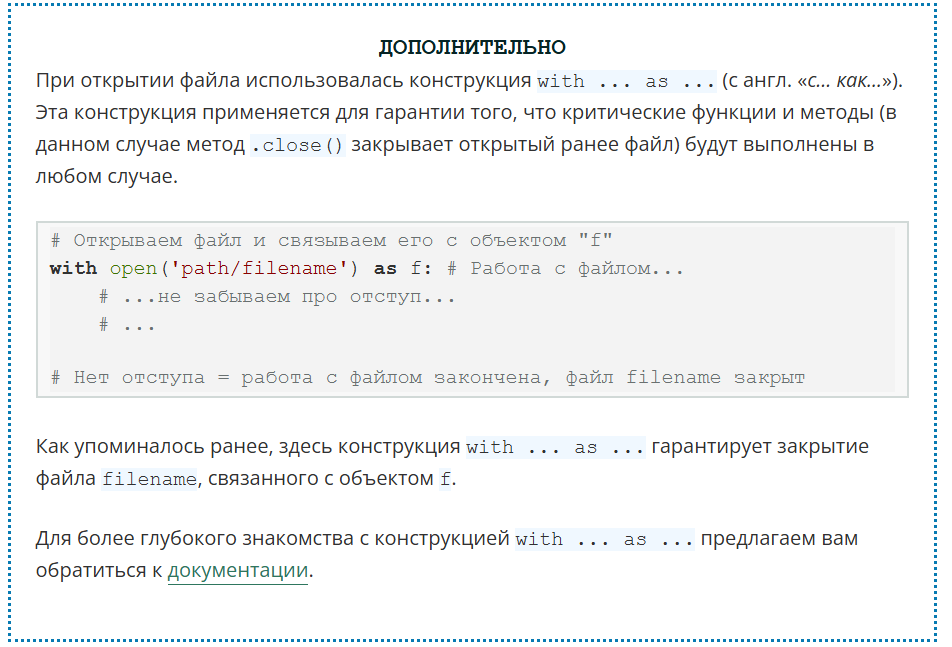

In [8]:
# Создаем DataFrame из файла, явно указав кодировку символов, и выводим его содержимое на экран
data=pd.read_csv('data/ErrorEnCoding.csv', encoding='koi8-r', header=None)
display(data)

0                           1             2
0   User_943         Accumanst@gmail.com         Ижевск
1   User_908           Advismowr@mail.ru         Ижевск
2   User_962             Anachso@ukr.net      Краснодар
3   User_973            Antecia@inbox.ru          Пермь
4   User_902          Balliaryva@ukr.net               
..        ...                         ...           ...
95  User_959    UpdatesCurious@yahoo.com         Тюмень
96  User_901          V2artierso@mail.ru    Арзангелтск
97  User_970            Vashoterlo@bk.ru        Воронеж
98  User_965         Visuareda@yahoo.com        Воронеж
99  User_921                Aavast@ya.ru         Ижевск

[100 rows x 3 columns]

# Чтение файла по ссылке, используя функцию read_table() #

Ранее вы уже считывали данные из файла melb_data.csv, который находится в свободном доступе в интернете, используя функцию read_csv(). Попробуем использовать функцию read_table(), указав в качестве разделителя данных запятую — ','.

In [9]:
data = pd.read_table('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv', sep=',')
display(data)

Unnamed: 0        Suburb           Address  Rooms Type      Price  \
0               1    Abbotsford      85 Turner St      2    h  1480000.0   
1               2    Abbotsford   25 Bloomburg St      2    h  1035000.0   
2               4    Abbotsford      5 Charles St      3    h  1465000.0   
3               5    Abbotsford  40 Federation La      3    h   850000.0   
4               6    Abbotsford       55a Park St      4    h  1600000.0   
...           ...           ...               ...    ...  ...        ...   
18391       23540  Williamstown   8/2 Thompson St      2    t   622500.0   
18392       23541  Williamstown      96 Verdon St      4    h  2500000.0   
18393       23544     Yallambie      17 Amaroo Wy      4    h  1100000.0   
18394       23545    Yarraville        6 Agnes St      4    h  1285000.0   
18395       23546    Yarraville     33 Freeman St      4    h  1050000.0   

      Method     SellerG        Date  Distance  ...  Bathroom  Car  Landsize  \
0          S      Biggin   3/12/2016       2.5  ...       1.0  1.0     202.0   
1          S      Biggin   4/02/2016       2.5  ...       1.0  0.0     156.0   
2         SP      Biggin   4/03/2017       2.5  ...       2.0  0.0     134.0   
3         PI      Biggin   4/03/2017       2.5  ...       2.0  1.0      94.0   
4         VB      Nelson   4/06/2016       2.5  ...       1.0  2.0     120.0   
...      ...         ...         ...       ...  ...       ...  ...       ...   
18391     SP        Greg  26/08/2017       6.8  ...       2.0  1.0       NaN   
18392     PI     Sweeney  26/08/2017       6.8  ...       1.0  5.0     866.0   
18393      S  Buckingham  26/08/2017      12.7  ...       3.0  2.0       NaN   
18394     SP     Village  26/08/2017       6.3  ...       1.0  1.0     362.0   
18395     VB     Village  26/08/2017       6.3  ...       2.0  2.0       NaN   

       BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  \
0               NaN        NaN        Yarra  -37.79960  144.99840   
1              79.0     1900.0        Yarra  -37.80790  144.99340   
2             150.0     1900.0        Yarra  -37.80930  144.99440   
3               NaN        NaN        Yarra  -37.79690  144.99690   
4             142.0     2014.0        Yarra  -37.80720  144.99410   
...             ...        ...          ...        ...        ...   
18391          89.0     2010.0          NaN  -37.86393  144.90484   
18392         157.0     1920.0          NaN  -37.85908  144.89299   
18393           NaN        NaN          NaN  -37.72006  145.10547   
18394         112.0     1920.0          NaN  -37.81188  144.88449   
18395         139.0     1950.0          NaN  -37.81829  144.87404   

                  Regionname  Propertycount  
0      Northern Metropolitan         4019.0  
1      Northern Metropolitan         4019.0  
2      Northern Metropolitan         4019.0  
3      Northern Metropolitan         4019.0  
4      Northern Metropolitan         4019.0  
...                      ...            ...  
18391   Western Metropolitan         6380.0  
18392   Western Metropolitan         6380.0  
18393  Northern Metropolitan         1369.0  
18394   Western Metropolitan         6543.0  
18395   Western Metropolitan         6543.0  

[18396 rows x 22 columns]

# Чтение/запись архивированных CSV-файлов #

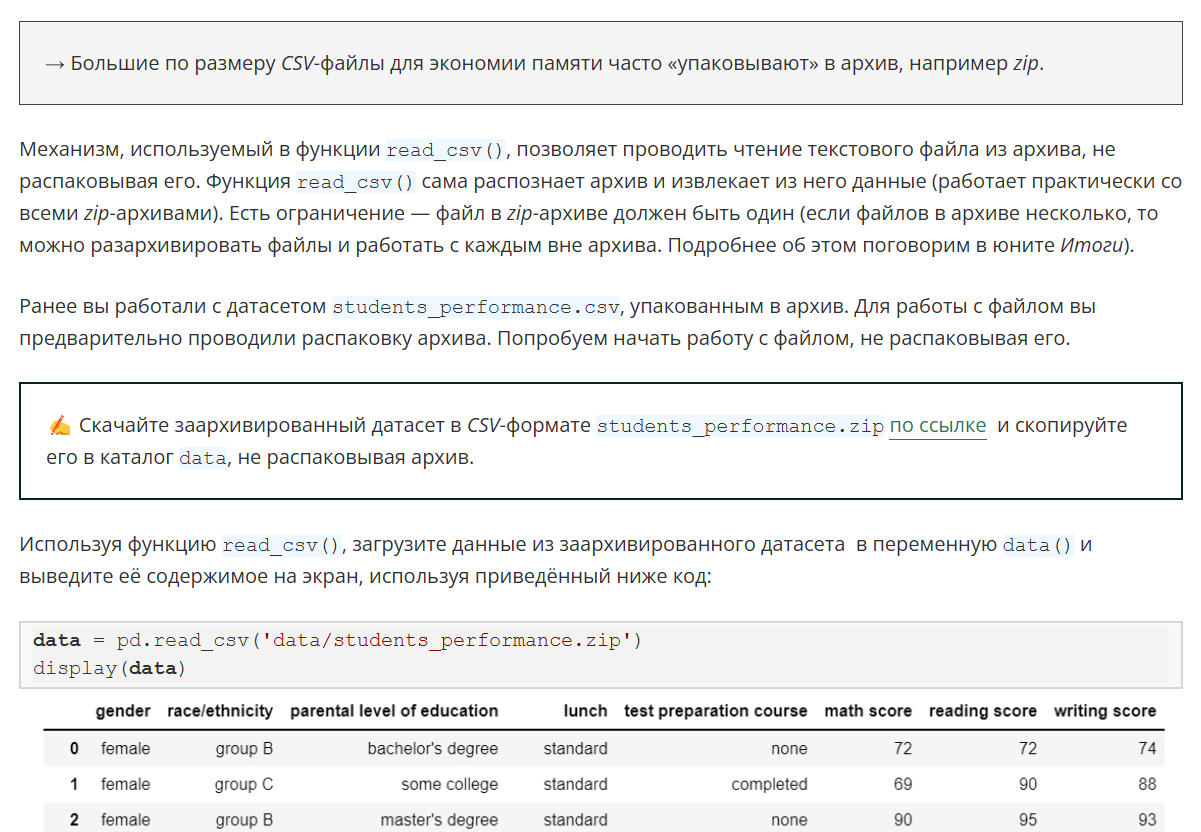

In [10]:
data = pd.read_csv('data/students_performance.zip')
display(data)

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

В функции to_csv() предусмотрен механизм, позволяющий проводить упаковку CSV-файлов в zip-архив. Проделаем обратную операцию — данные из DataFrame data запишем в CSV-файл, упакуем полученный файл в zip-архив «на лету» и сохраним полученный архив в папке data, выполнив следующий код:

In [11]:
# Определяем параметры архивирования — метод сжатия, имя файла в архиве
compression_opts = dict(method='zip', archive_name='out.csv') 
data.to_csv('data/out.zip', index=False, compression=compression_opts)

# 3. Работа с файлами Excel #

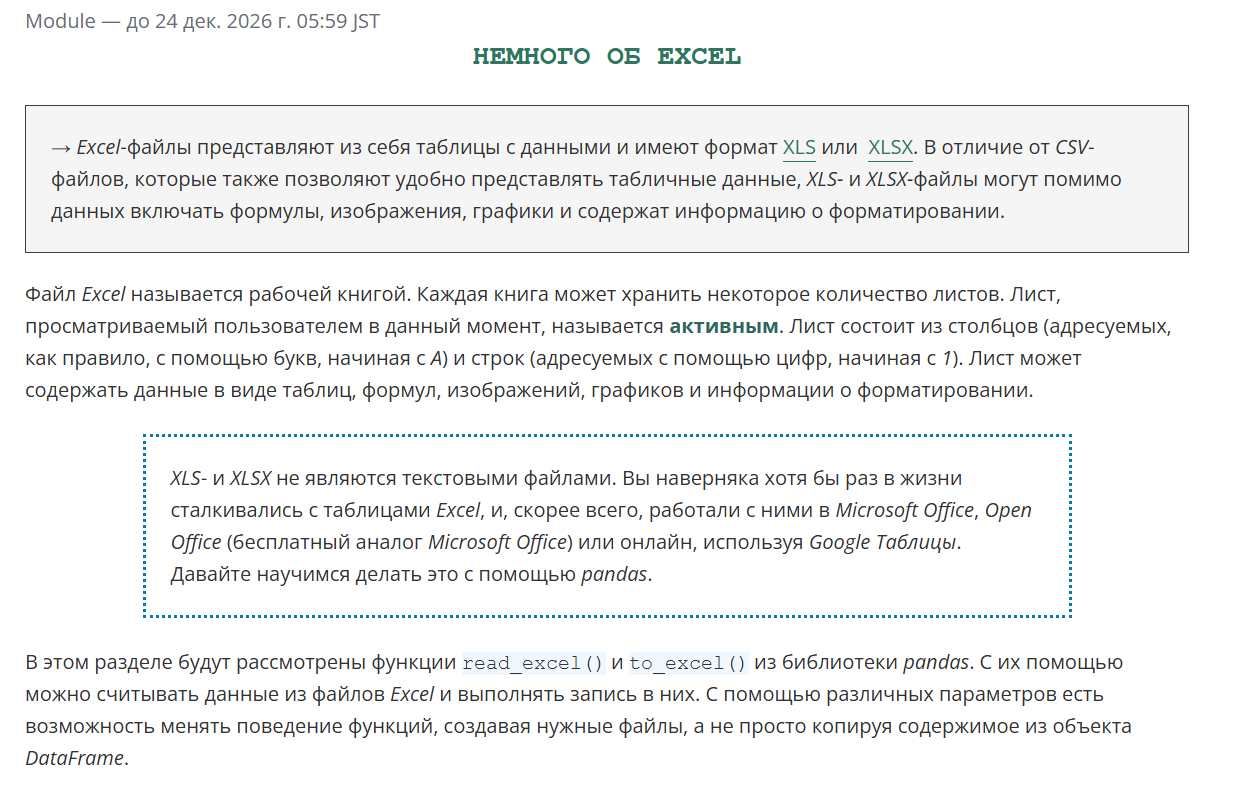

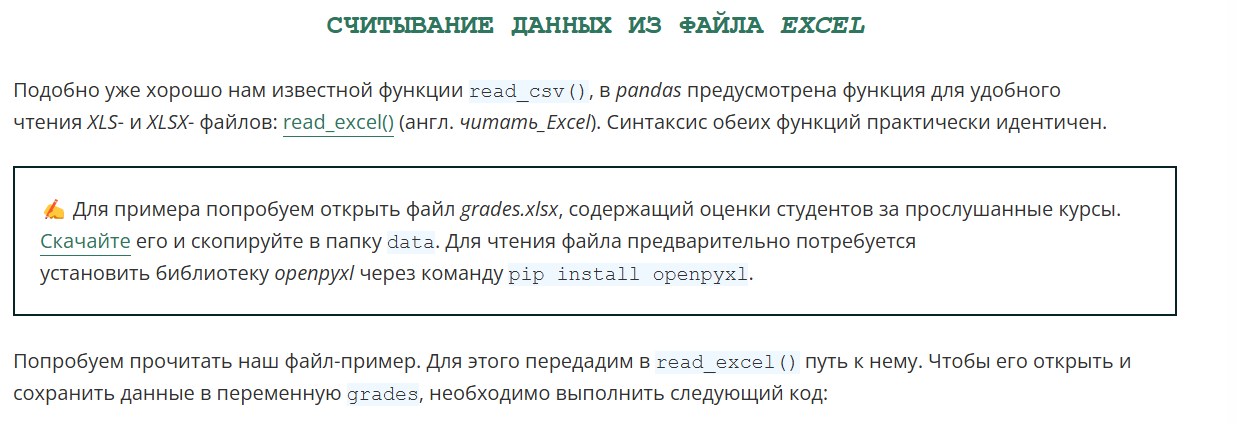

In [14]:
grades = pd.read_excel('data/grades.xlsx')
display(grades.head())

Student ID Student name  Grade
0           1          Аня      8
1           2         Катя      9
2           3         Маша      7
3           4         Миша      4
4           5         Женя      8

Так же, как и read_csv(), функция read_excel() может принимать на вход не только путь к файлу на компьютере, но и интернет-ссылку на него.

# Считывание данных из файла EXCEL по ссылке #

Если файл находится в открытом доступе по ссылке (например, на Google Диске или GitHub), его можно прочитать и из интернета — для этого достаточно в функции read_excel() вместо пути до файла указать ссылку на файл. Например:

In [15]:
data = pd.read_excel('https://github.com/asaydn/test/raw/master/january.xlsx', skiprows=3)
display(data)

Location  Oranges  Apples  Bananas  Blueberries  Total
0      Toronto     7651    4422     8580         3679  24332
1  Los Angeles      273    2998     9890         7293  20454
2      Atlanta     3758    6752     4599         4149  19258
3     New York     4019    8796     8486         9188  30489

Основные параметры метода read_excel()

io — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете.

sheet_name —  ссылка на лист в Excel-файле (возможные значения данного параметра: 0 — значение по умолчанию, загружается первый лист; 'Sheet1' — можно передать название листа; обычно листы называются 'SheetX', где X — номер листа, но могут использоваться и другие названия; [0, 1, 'Sheet3'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame; None — если передать такое значение, то pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте).

na_values — список значений, которые будут считаться пропусками ( ‘’, ‘#N/A’, ‘ N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’).

Следует также учесть, что нормальное поведение pandas — это считывание значений (формулы из Excel-файла не считываются).

Как упоминалось выше, один Excel-файл может включать в себя несколько листов, которые отображаются в разных вкладках (англ. sheet, рус. лист). Например, в нашем файле два листа — Maths и ML.

По умолчанию в DataFrame читается информация из первого листа, однако read_excel()  позволяет выбрать, из какого именно листа загружать данные. Сделать это можно с помощью параметра sheet_name (рус. имя_листа). Например, чтобы прочесть данные из второго листа (ML) файла, выполним код:

In [16]:
grades = pd.read_excel('data/grades.xlsx', sheet_name='ML')
display(grades.head())

Student ID Student name  Grade
0           1          Аня      7
1           2         Катя      5
2           3         Маша      9
3           4         Миша      8
4           5         Женя      9

In [17]:
grades = pd.read_excel('data/grades.xlsx', sheet_name='Maths')
display(grades.head())

Student ID Student name  Grade
0           1          Аня      8
1           2         Катя      9
2           3         Маша      7
3           4         Миша      4
4           5         Женя      8

# Выгрузка данных из DataFrame в Excel-файл #

После обработки данных (очистка, создание новых признаков и т. д.) методами и функциями pandas мы сталкиваемся с обратной задачей — сохранить данные из DataFrame в Excel-файл.

Для этого в pandas есть функция to_excel() (рус. в_Excel), принцип работы которой очень схож с функцией to_csv():

In [18]:
# Сохраняем данные из DataFrame grades в файл grades_new.xlsx в папке data
grades.to_excel('data/grades_new.xlsx')

В этом случае будет создан один лист с именем по умолчанию "Sheet1". Также мы сохраним и индекс — в данных будет находиться лишний столбец. Чтобы создать лист с определённым именем (например, Example) и не сохранять индекс, в метод  to_excel() необходимо передать параметры sheet_name='Example' и index=False:

In [19]:
# Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data
grades.to_excel('data/grades_new.xlsx', sheet_name='Example', index=False)

openpyxl — рекомендуемый пакет для чтения и записи файлов Excel 2010+ (например, xlsx);

xlsxwriter — альтернативный пакет для записи данных, информации о форматировании и, в частности, диаграмм в формате Excel 2010+ (например, xlsx);

pyxlsb — пакет позволяет читать файлы Excel в xlsb-формате;

pylightxl — пакет позволяет читать xlsx- и xlsm-файлы и записывать xlsx-файлы;

xlrd — пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, xls);

xlwt — пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, xls).

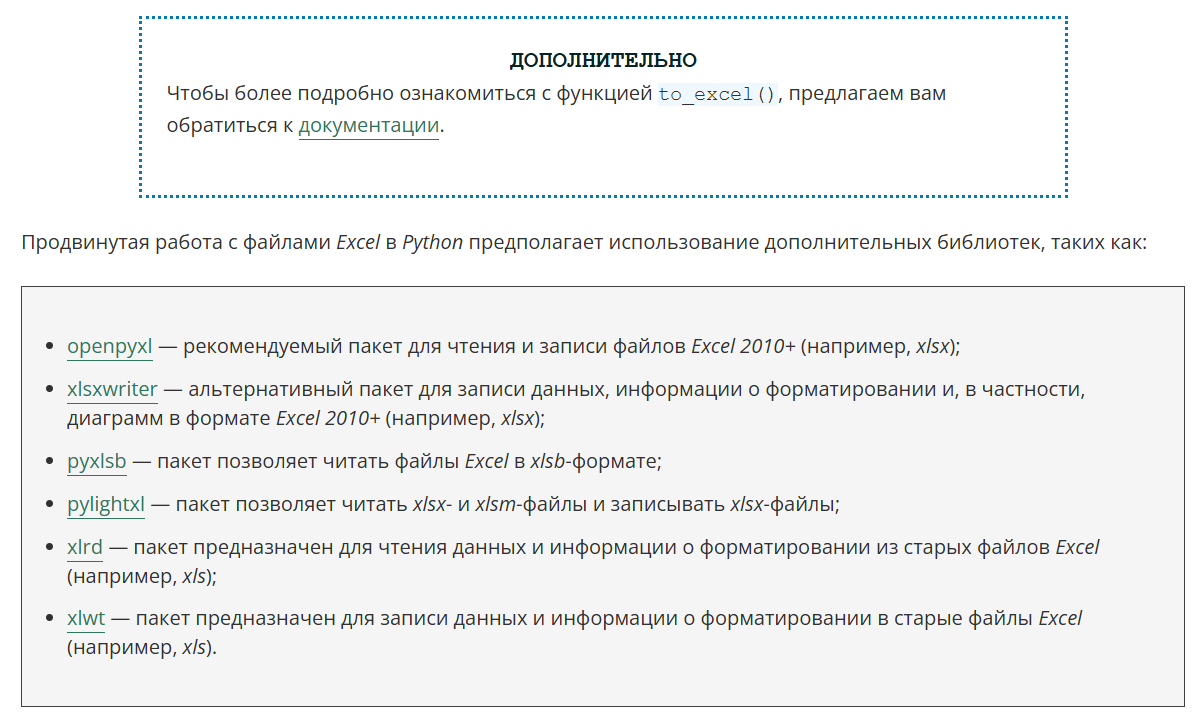

In [21]:
movies_data_ratings = pd.read_excel('data/ratings_movies.xlsx', sheet_name='ratings')
display(movies_data_ratings.head())

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [22]:
movies_data_movies = pd.read_excel('data/ratings_movies.xlsx', sheet_name='movies')
display(movies_data_movies.head())

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [31]:
joined = movies_data_ratings.merge(movies_data_movies, on='movieId', how='left')
display(joined.head())         
joined.to_excel('data/joined.xlsx', sheet_name='JOINED', index=False)

userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller

# 4. JSON. Что это? #

→ JSON — это простой, структурированный формат обмена данными, основанный на использовании текста.

Под обменом данных в этом контексте чаще всего подразумевается передача данных по компьютерным сетям, например пересылка данных от сервера к браузеру.

Аббревиатура JSON расшифровывается как JavaScript Object Notation, в переводе на русский — система обозначения/записи объектов JavaScript. Несмотря на то, что JSON изначально основывался на языке программирования JavaScript, он является общепризнанным форматом обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с ним.

Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести.

Именно этим мы сейчас и займёмся!

Итак, JSON — это простой, структурированный, основанный на использовании текста формат обмена данными.

# Модули для работы с JSON #

Для работы с данными в формате JSON используется модуль json из стандартной библиотеки языка Python, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

In [32]:
# Импортируем модуль json
import json

Также нам может быть полезен модуль pprint  (от англ. pretty print, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция pprint(), с помощью которой можно красиво выводить на экран содержимое JSON-файла. Для загрузки нужной нам функции перед началом работы выполним следующий код:

In [33]:
# Импортируем функцию pprint()
from pprint import pprint

# КАК ВЫГЛЯДИТ JSON-ФАЙЛ? #

Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

набор пар "ключ-значение", где ключ — это всегда строковая величина (в Python такая структура преобразуется в словарь);

упорядоченный набор значений (при чтении JSON-файла в Python эта структура будет преобразована в список).

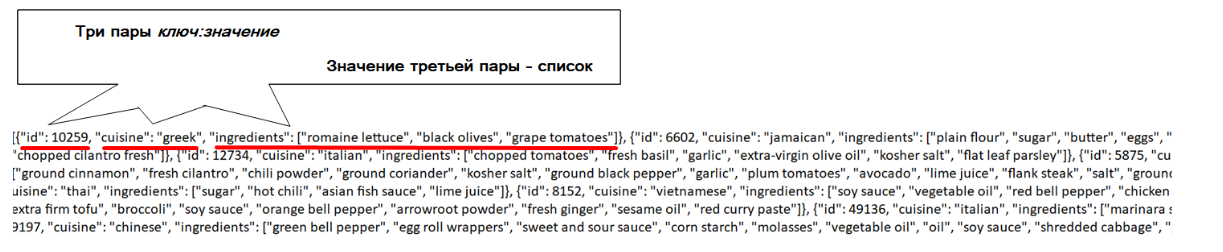

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

# 5. JSON. Открываем JSON-файл и извлекаем данные #

ОТКРЫВАЕМ JSON-ФАЙЛ

→ Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

In [35]:
# Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f:  
    # Загружаем содержимое открытого файла в переменную recipes  
    recipes = json.load(f)

Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

In [36]:
# Выводим на экран содержимое переменной recipes, используя функцию pprint()
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

Ключ "cuisine" — обозначает принадлежность блюда к определённой национальной кухне (например, 'greek', 'southern_us', 'filipino' и т. д.);

Ключ "id" — уникальный идентификационный номер блюда;

Ключ "ingredients"— содержит перечень продуктов, входящих в состав блюда.

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

# ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА #

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — 0, и информация о нём хранится в словаре. Чтобы узнать ID этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [37]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:

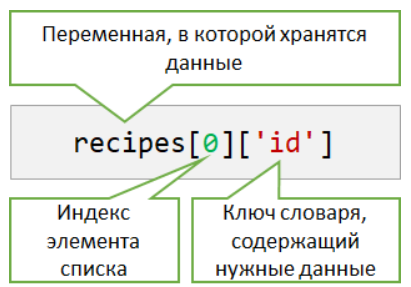

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients'. 

In [38]:
recipes[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

Мы также можем извлечь информацию о конкретном блюде по его ID. Для этого необходимо с помощью цикла, например for, перебрать все элементы списка, проверяя ключ 'id',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

In [39]:
for recipe in recipes: # начинаем перебор всех блюд входящих в список
    if recipe['id'] == 13121: # если id текущего блюда равен заданному для поиска
        print(recipe['cuisine']) # выводим на экран наименование кухни, к которой относится блюдо
        break # прерываем выполнение цикла, т.к. нужное блюдо найдено

thai


На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

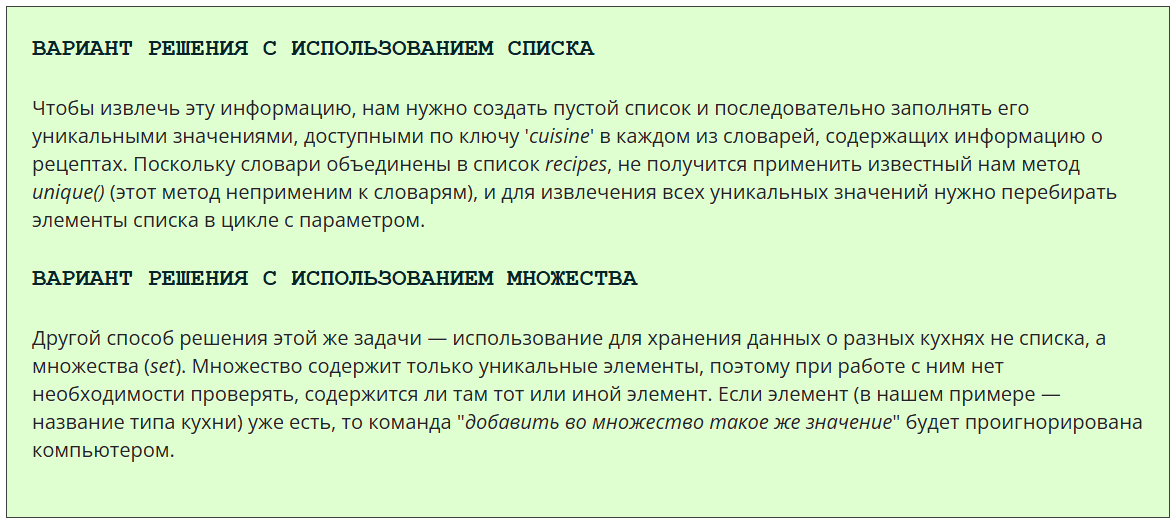

In [ ]:
# Используя список 
cuisines = [] # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines) # Выводим на экран полученное значение

20

In [48]:
# Используя множество
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines) # Выводим на экран полученное значение

20

In [50]:
cuisines = [] 
for recipe in recipes:
    cuisines.append(recipe['cuisine'])

pd.Series(cuisines).describe()

count         500
unique         20
top       italian
freq          101
dtype: object

In [51]:
cuisines = [] # Создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # Начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # Если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # Добавляем его к списку cuisines
valreccuisine = {} # Создаём пустой словарь для хранения информации об количествах рецептов в каждой кухне
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 # Добавляем в словарь ключ, соответствующий очередной кухне
for recipe in recipes: # Перебираем список рецептов
    valreccuisine[recipe['cuisine']] += 1 # Увеличиваем значение нужного ключа в словаре на 1
            
print(max(valreccuisine, key=valreccuisine.get)) # Извлекаем значения для всех ключей используя метод get(), выбираем самое максимальное значение (при наличии одинаковых значений будет выбрано первое в словаре) и выводим на экран ключ максимального значения
          

italian


# 6. JSON. Работаем с pandas. Из JSON в pandas #

ИЗ JSON В PANDAS

→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [52]:
# Импортируем модуль json
import json 
# Импортируем функцию pprint()
from pprint import pprint 
# Импортируем модуль pandas
import pandas as pd 
# Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 
# Создаём объект DataFrame из списка recipes
df = pd.DataFrame(recipes) 
# Выводим на экран первые строки полученного DataFrame
display(df.head())

id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...

ДОПОЛНИТЕЛЬНО

Для непосредственного считывания содержимого файла recipes.json в переменную df (объект DataFrame) используйте функцию read_json() (с англ. читать_json).

In [53]:
# Импортируем модуль pandas
import pandas as pd 
# Создаём объект DataFrame, загружая содержимое файла recipes.json
df = pd.read_json('recipes.json') 

# Выводим на экран первые строки полученного DataFrame
display(df.head())

id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...

→ Итак, получившийся DataFrame содержит информацию о рецептах из нашего JSON-файла. 

Каждая строка соответствует одному рецепту, в столбце id хранится его идентификационный номер, в столбце cuisine — тип кухни, а столбец ingredients содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

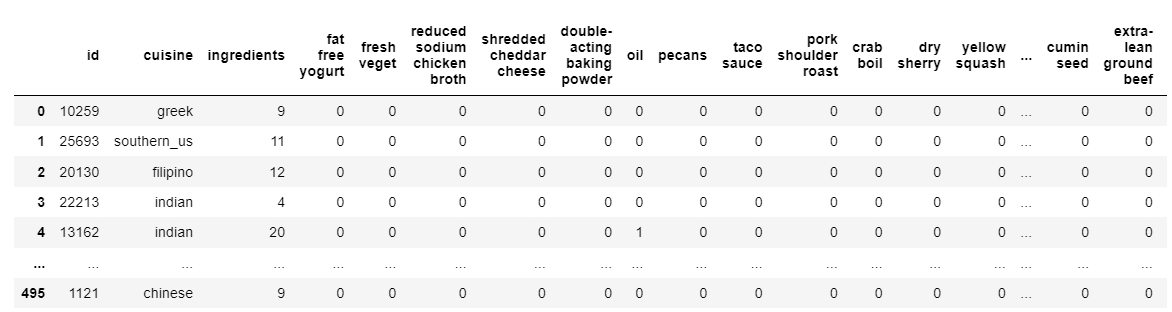

Давайте шаг за шагом преобразуем DataFrame в такой вид.

Работу над преобразованием DataFrame начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения выполним в два этапа:

1. Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце ingredients для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.

2. Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу ingredients функцию, созданную нами на предыдущем этапе.

In [54]:
# Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 

# Создаем пустое множество для хранения реестра уникальных ингредиентов
all_ingredients=set() 

# Начинаем перебор всех блюд входящих в список
for recipe in recipes: 
    # Начинаем перебор всех ингредиентов входящих в состав текущего блюда
    for ingredient in recipe['ingredients']: 
        # Добавляем уникальный ингредиент в реестр
        all_ingredients.add(ingredient ) 

# Выводим на экран количество уникальных ингредиентов из реестра
print(len(all_ingredients))

1318


→ Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

 Функция будет возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует:

In [55]:
# Определяем имя функции и передаваемые аргументы    
def contains(ingredient_list): 
    # Если ингредиент есть в текущем блюде,
    if ingredient_name in ingredient_list:   
        # возвращаем значение 1
        return 1 
    # Если ингредиента нет в текущем блюде,
    else: 
        # возвращаем значение 0
        return 0

Отлично! Осталось лишь перебрать все ингредиенты из ранее созданного реестра all_ingredients с помощью цикла  for  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу ingredients функцию contains().

In [56]:
# Последовательно перебираем ингредиенты в реестре all_ingredients
for ingredient_name in all_ingredients: 
    # В DataFrame cоздаем столбец с именем текущего ингредиента 
    # и заполняем его единицами и нулями,
    # используя ранее созданную функцию contains
    df[ingredient_name] = df['ingredients'].apply(contains)

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_34848\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_34848\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_34848\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

In [57]:
# Заменяем список ингредиентов в рецепте на их количество 
df['ingredients'] = df['ingredients'].apply(len) 
# Выводим содержимое полученного DataFrame на экран
display(df)

id      cuisine  ingredients  tapioca starch  Mexican cheese blend  \
0    10259        greek            9               0                     0   
1    25693  southern_us           11               0                     0   
2    20130     filipino           12               0                     0   
3    22213       indian            4               0                     0   
4    13162       indian           20               0                     0   
..     ...          ...          ...             ...                   ...   
495   1121      chinese            9               0                     0   
496  18376      italian            8               0                     0   
497  17815      italian            8               0                     0   
498  32878  southern_us           19               0                     0   
499  24410      british           17               0                     0   

     non-fat sour cream  chili powder  ground pepper  fresh lime juice  \
0                     0             0              0                 0   
1                     0             0              1                 0   
2                     0             0              0                 0   
3                     0             0              0                 0   
4                     0             1              0                 0   
..                  ...           ...            ...               ...   
495                   0             0              1                 0   
496                   0             0              0                 0   
497                   0             0              0                 0   
498                   0             0              0                 0   
499                   0             0              0                 0   

     brown sugar  ...  octopuses  walnuts  chopped almonds  pickapeppa sauce  \
0              0  ...          0        0                0                 0   
1              0  ...          0        0                0                 0   
2              0  ...          0        0                0                 0   
3              0  ...          0        0                0                 0   
4              0  ...          0        0                0                 0   
..           ...  ...        ...      ...              ...               ...   
495            0  ...          0        0                0                 0   
496            0  ...          0        0                0                 0   
497            0  ...          0        0                0                 0   
498            0  ...          0        0                0                 0   
499            0  ...          0        0                0                 0   

     diced celery  cajun seasoning  butter lettuce  fresh parmesan cheese  \
0               0                0               0                      0   
1               0                0               0                      0   
2               0                0               0                      0   
3               0                0               0                      0   
4               0                0               0                      0   
..            ...              ...             ...                    ...   
495             0                0               0                      0   
496             0                0               0                      0   
497             0                0               0                      0   
498             0                1               0                      0   
499             0                0               0                      0   

     ground turmeric  savoy cabbage  
0                  0              0  
1                  0              0  
2                  0              0  
3                  0              0  
4                  0              0  
..               ...            ...  
495                0          

# СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ #

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

In [58]:
df.to_csv('recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра index как False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции read_csv().

# 7. JSON. Работаем с pandas. Из pandas в JSON #

→ Решим обратную задачу и создадим JSON-файл из сохранённого ранее CSV-файла, который получили в конце предыдущего этапа. 

Начнём с чтения файла и создания DataFrame на его основе:

In [59]:
# Создаём DataFrame, читаем данные из файла в переменную df
df = pd.read_csv('recipes.csv')

Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Мы помним, что после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов входящих в состав блюда.

Поскольку по условию задачи мы не можем использовать предыдущие наработки, давайте начнём с создания списка, содержащего перечень id всех блюд, а также списка ингредиентов, встречающихся в рецептах. Эти списки в дальнейшем мы будем использовать для заполнения JSON-структуры.

Напишите код для создания списка id всех блюд, нужны только уникальные значения представленных в DataFrame. Результирующий список занесите в переменную ids.

In [60]:
df = pd.read_csv('recipes.csv')
ids = list(df['id'].unique())

Напишите код для создания списка ингредиентов всех блюд, представленных в DataFrame. Результирующий список занесите в переменную ingredients.

In [62]:
df=pd.read_csv('recipes.csv')
ingredients=list(df.columns)[3:]

→ Отлично! Теперь мы можем использовать подготовленные списки ids и ingredients для непосредственного создания JSON-структуры.

После десериализации JSON-файла мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "ключ-значение", при этом в качестве значений выступали:

целое число (id блюда);
строковая величина (тип кухни);
список строковых величин (перечень ингредиентов).
Сейчас нам предстоит воссоздать эту структуру, извлекая данные из DataFrame. Для этого необходимо создать:

пустой список new_recipes — для хранения итоговой структуры;
используя код из Задачи 7.1, список ids — для хранения id всех блюд;
используя код из Задачи 7.2, список ingredients — для хранения названий всех ингредиентов.

✍️ Далее необходимо реализовать следующий алгоритм:

1. Написать код функции make_list(), которая принимает на вход строку DataFrame df, содержащую полные данные об одном блюде (в виде Series), и возвращает перечень ингредиентов, входящих в состав этого блюда (в виде списка).

2. Организовать цикл с параметром, в котором будут перебираться элементы списка ids. В результате в процессе прохождения цикла параметр должен принять значение id каждого блюда.

3. На каждом шаге цикла создать словарь, содержащий три пары "ключ-значение":

ключу "id" присвоить текущее значение параметра цикла как целого числа;

ключу "cuisine" присвоить значение соответствующей кухни, которое мы получим, применив фильтр по текущему id к DataFrame df;

ключу "ingredients" присвоить значение списка, воспользовавшись функцией make_list(), созданной на первом шаге алгоритма.

4. Каждый созданный словарь добавить к списку new_recipes:

Напишите код функции make_list(), которая принимает на вход одну строку DataFrame, содержащую данные об одном рецепте (в виде Series), и возвращает перечень ингредиентов этого блюда (в виде списка).

Функция make_list() должна принимать только один аргумент - row. Это будет строка датафрейма.

Не забудьте импортировать необходимые бибилиотеки, считать файл recipes.csv и создать список ingredients.

In [65]:
# Определяем имя функции и передаваемые аргументы
def make_list(row): 
    # Создаем пустой список ингредиентов текущего блюда
    ingredient_list=[] 
    # Последовательно перебираем ингредиенты из реестра
    for ingredient in ingredients: 
        # Если текущий ингредиент входит в состав текущего блюда
        if row[ingredient].item()==1: 
            # Добавляем ингредиент в список ингредиентов текущего блюда
            ingredient_list.append(ingredient) 
    # Возвращаем сформированный список ингредиентов
    return ingredient_list

In [66]:
# Создаём пустой список для хранения итоговой структуры
new_recipes = [] 
# Организуем цикл с параметром current_id
for current_id in ids: 
    # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame;
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] 
    # Получаем перечень ингредиентов, входящих в состав текущего блюда
    current_ingredients = make_list(df[df['id'] == current_id]) 
    # Создаём текущий словарь
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} 
    # Добавляем созданный словарь к списку
    new_recipes.append(current_recipe)

Выполним сериализацию списка new_recipes и запишем полученные данные в файл.

Для сериализации  используем функцию dumps(), которой в качестве параметра передадим список new_recipes. Запись в файл осуществляется с помощью метода write(). Предварительно файл необходимо открыть для записи с помощью функции open() c параметром 'w' (от англ. write, рус. писать):

In [67]:
# Импорт модуля json
import json 
# Функция dumps() модуля json сериализирует объект Python в строку формата JSON. 
new_recipes = json.dumps(new_recipes) 

# Откроем файл new_recipes.json для записи
with open("data/new_recipes.json", "w") as write_file: 
    # Записываем содержимое подготовленные данные в файл
    write_file.write(new_recipes)

# 8. XML. Что это? #

→ Аббревиатура XML расшифровывается как eXtensible Markup Language — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Если вы когда-нибудь сталкивались с HTML, языком разметки для создания веб-страниц, то можете заметить, что XML очень похож на него. Однако в отличие от HTML, где теги заранее чётко заданы, в XML мы можем задавать теги сами.

Например, если мы хотим описать меню в ресторане в формате XML-документа, мы можем сделать это так:

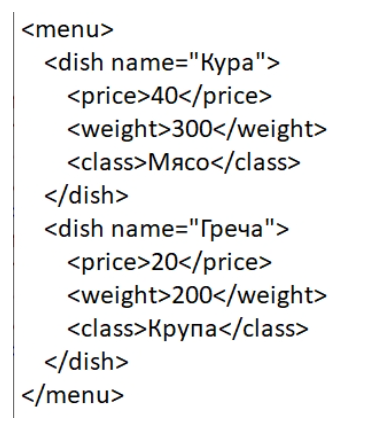

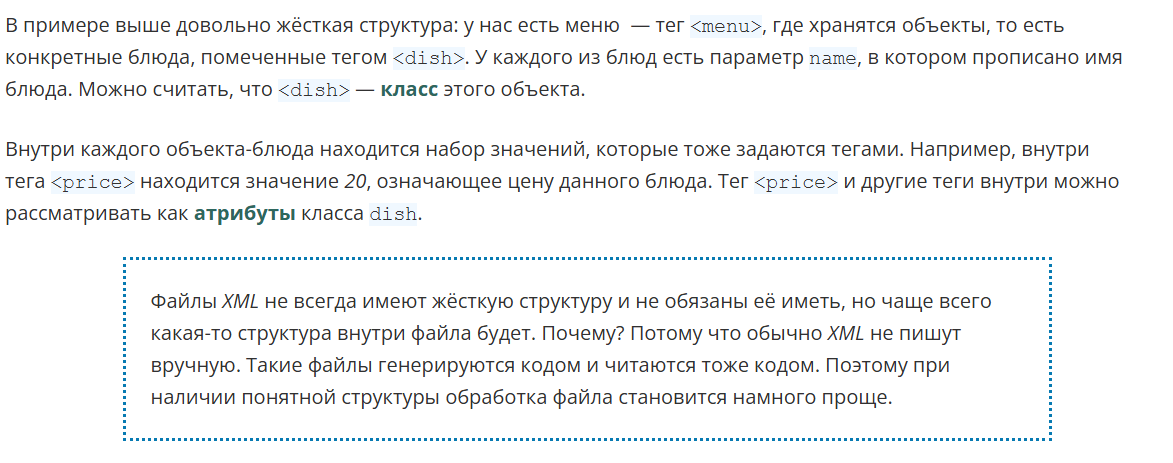

# 9. XML. Контент XML-файла #

## Извлекаем контент из XML-файла ##

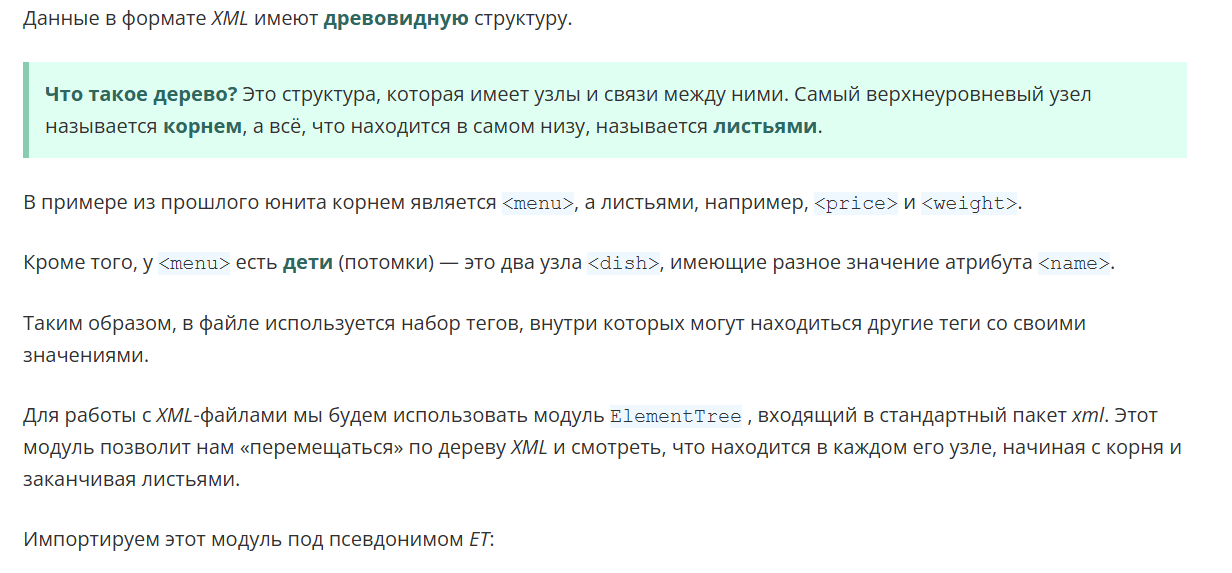

In [68]:
# Импортируем модуль ElementTree
import xml.etree.ElementTree as ET

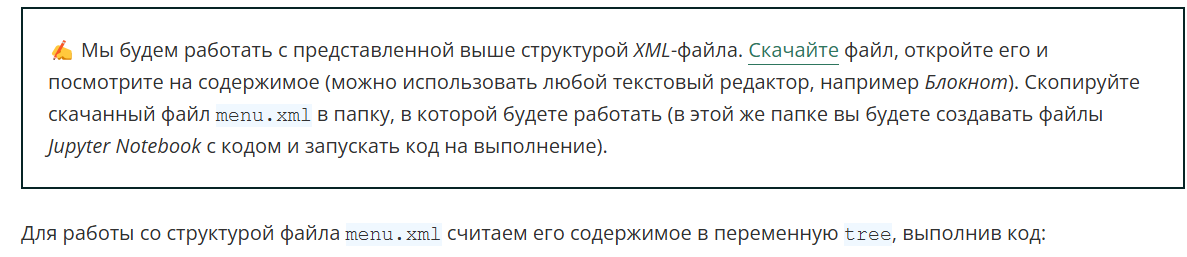

In [69]:
tree = ET.parse('menu.xml')

### Корень ###

Запишем в переменную root корневой узел дерева tree и посмотрим, как выглядит содержимое переменной root, для чего выполним код:

In [70]:
root = tree.getroot()
display(root)

<Element 'menu' at 0x00000111532AF3D0>

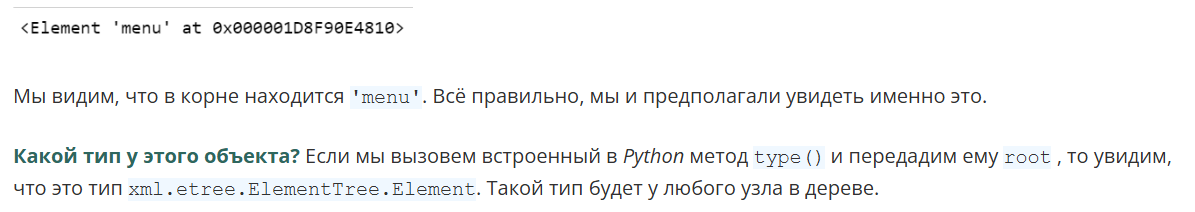

In [71]:
display(type(root))

xml.etree.ElementTree.Element

### Потомки ###

Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

In [72]:
display(list(root))

[<Element 'dish' at 0x00000111532ADA80>,
 <Element 'dish' at 0x00000111532AF510>]

Если у узла нет потомков, то вернётся пустой список — [].

Итак, использование list(root) возвращает список потомков указанного узла. У узла root, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами dish.

Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

In [73]:
display(list(root[1]))

[<Element 'price' at 0x00000111532AD670>,
 <Element 'weight' at 0x00000111532AC590>,
 <Element 'class' at 0x00000111532AC540>]

Таким образом, у второго потомка узла root —  три потомка.

### Атрибуты и теги ###

Как было сказано ранее, у узлов могут быть параметры, или атрибуты. Например, у узлов dish есть атрибут name, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя attrib.

Выведем на экран атрибуты первого блюда из меню:

In [74]:
display(root[0].attrib)

{'name': 'Кура'}

В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

Например, возьмём узел price первого блюда из меню:

In [75]:
display(root[0][0])

<Element 'price' at 0x00000111532ADAD0>

Теперь прочитаем значение этого узла с помощью text:

In [76]:
display(root[0][0].text)

'40'

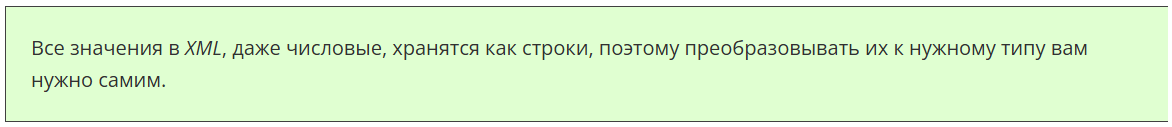

Например, в данном случае можно обернуть значение стоимости в int() или float().

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

In [77]:
display(root.tag)

'menu'

Какое наименование имеет тег узла root[0][2]?

In [82]:
display(root[0][2].tag)

'class'

### Использование циклов ###

→ Итак, мы научились обращаться к отдельным узлам дерева, представляющего XML-структуру, и извлекать информацию о его атрибутах, значении и потомках.

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

In [83]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



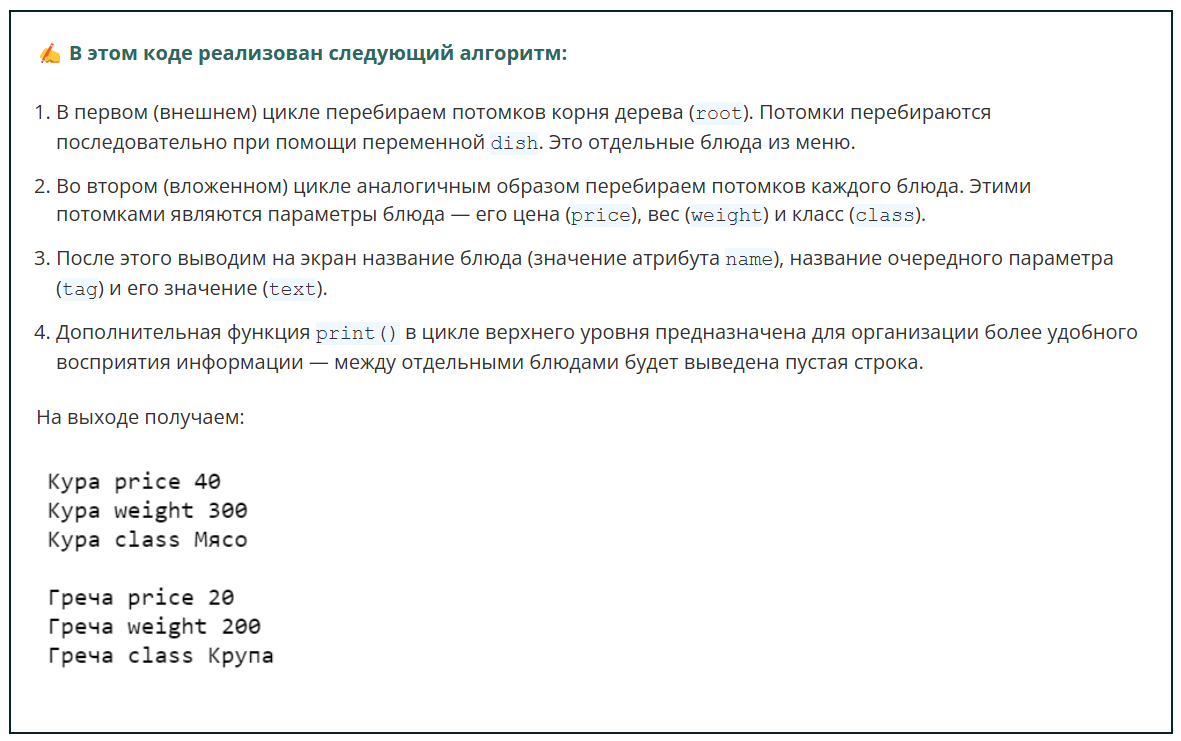

# 10. XML. Загружаем, создаем, сохраняем #

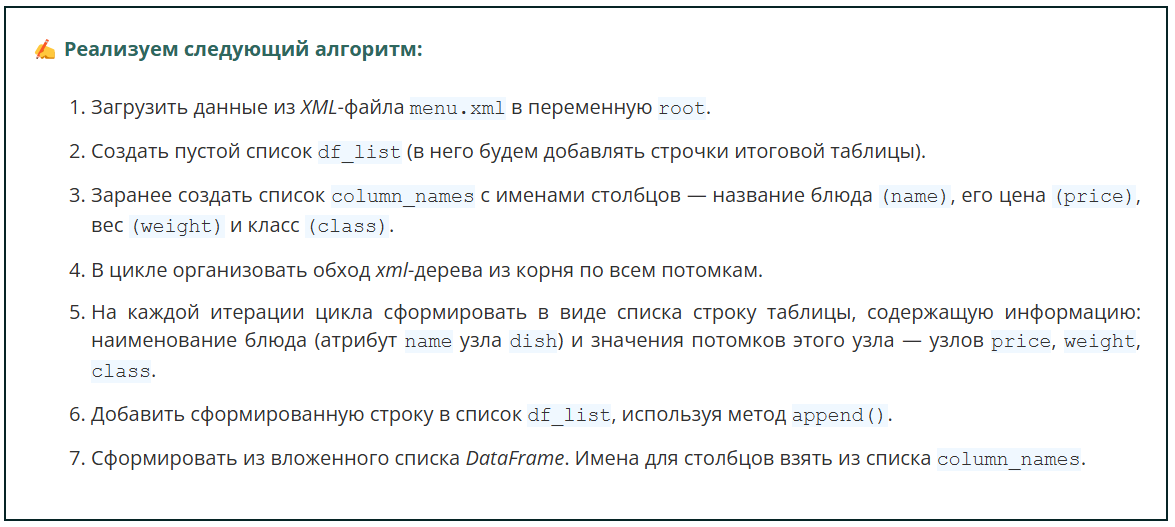

Код, который реализует этот алгоритм:

In [84]:
import xml.etree.ElementTree as ET
tree = ET.parse('menu.xml')
root = tree.getroot()

import pandas as pd
column_names = ['name', 'price', 'weight', 'class']
df_list = []

for dish in root:
    row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
    df_list.append(row)

df = pd.DataFrame(df_list, columns=column_names)
display(df)

name price weight  class
0   Кура    40    300   Мясо
1  Греча    20    200  Крупа

### Создаём XML-файл ###

→ Воссоздадим структуру нашего исходного XML-файла с нуля,  руководствуясь общими рекомендациями.

Чтобы создать корень дерева, используем метод Element() из класса ElementTree:

In [85]:
import xml.etree.ElementTree as ET

new_root = ET.Element('menu')
display(new_root)

<Element 'menu' at 0x00000111533F5300>

Теперь мы можем добавлять новые узлы в наше дерево, используя метод SubElement() из того же класса.

Добавим в наше меню двух потомков корневого узла, которые будут представлять два блюда, то есть будут узлами dish:

In [86]:
dish1 = ET.SubElement(new_root, 'dish', name='Кура')

dish2 = ET.SubElement(new_root, 'dish', name='Греча')

display(list(new_root))

[<Element 'dish' at 0x00000111533F4040>,
 <Element 'dish' at 0x0000011153250310>]

В метод SubElement() мы передали первым аргументом узел, к которому добавляем потомка, вторым аргументом — наименование нового тега (dish),  третьим аргументом — наименование атрибута нового узла( name ) и его значение.

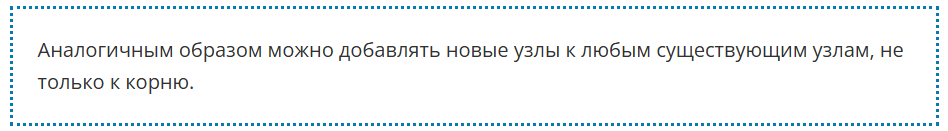

Добавим в создаваемую структуру по три потомка (атрибута) к двум новым узлам, которые будут содержать информацию о блюде — о его цене (price), весе (weight) и классе (class), а также значение этих атрибутов:

In [87]:
price1 = ET.SubElement(dish1, "price").text = "40"
weight1 = ET.SubElement(dish1, "weight").text = "300"
class1 = ET.SubElement(dish1, "class").text = "Мясо"
display(list(dish1))

price2 = ET.SubElement(dish2, "price").text = "20"
weight2 = ET.SubElement(dish2, "weight").text = "200"
class2 = ET.SubElement(dish2, "class").text = "Крупа"
display(list(dish2))

[<Element 'price' at 0x0000011153251350>,
 <Element 'weight' at 0x0000011153253240>,
 <Element 'class' at 0x00000111532516C0>]

[<Element 'price' at 0x000001115324D080>,
 <Element 'weight' at 0x00000111532520C0>,
 <Element 'class' at 0x0000011153253E70>]

Проверим визуально корректность созданной нами структуры, выполнив фрагмент кода, разработанного ранее:

In [88]:
for dish in new_root:    
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



Созданная нами структура полностью идентична структуре исходного XML-файла.

### Сохранение XML-файла ###

→ В финале работы с файлом XML-формата запишем созданную нами структуру как XML-файл на диск.

Преобразуем созданный нами объект типа ElementTree.Element в строку c помощью метода tostring(), передав наше новое дерево как аргумент. Сохраним эту строку на диске, используя стандартные средства Python::

In [89]:
new_root_string = ET.tostring(new_root)

with open("new_menu.xml", "wb") as f:
    f.write(new_root_string)

✍️ Файл записан! Откройте его и посмотрите, что получилось.

Возможно, вы увидите проблему, связанную с кодировкой. Что делать в этом случае? Как вариант — записать файл, используя сам класс ElementTree() :

In [90]:
ET.ElementTree(new_root).write('new_menu_good.xml', encoding="utf-8")

Для этого мы передаём в класс ElementTree() наше дерево (не его строковое представление) и вызываем метод write(). В метод мы передаём путь к новому файлу и нужную нам кодировку.

#  5. Библиотека BeautifulSoup #

✍ Для поиска необходимых нам данных мы будем использовать библиотеку BeautifulSoup, которая позволяет по названию тегов и их атрибутов получать содержащийся в них текст.

BeautifulSoup не является частью стандартной библиотеки, поэтому для начала её нужно установить. Например, в Jupyter Notebook это делается с помощью такой команды:

In [1]:
# Устанавливаем библиотеку BeautifulSoup
!pip install beautifulsoup4 


   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   ---------------------------------------- 2/2 [beautifulsoup4]



После установки импортируем библиотеку в наш код:

In [2]:
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

Теперь мы можем извлекать данные из любой веб-страницы.

Ранее мы уже получили содержимое страницы с помощью GET-запроса и сохранили информацию в переменной response , теперь создадим объект BeautifulSoup с именем page, указывая в качестве параметра html.parser.

Для примера получим информацию o title (с англ. заголовок) — это строка, которая отображается на вкладке браузера:

In [3]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title) # Получаем тег title, отображающийся на вкладке браузера
print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

<title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей


Если при запросе к сайту, а затем при его разборе с помощью BeautifulSoup в тексте страницы не находится нужный тег, попробуйте вывести на печать пару тысяч символов текста страницы. Если там обнаружится нечто похожее на капчу, возможно, сайт посчитал вас роботом и отказывается выдавать содержимое. Чтобы получить его, попробуйте «притвориться» браузером при запросе из скрипта:

In [4]:
requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

<Response [200]>

### Извлекаем заголовок статьи ###

Выполним поставленную ранее задачу: получить информацию о странице и извлечь заголовок статьи, опубликованной на этой странице, дату публикации, а также текст статьи.

Предположим, что мы знаем, что в HTML-коде рассматриваемой нами страницы заголовок статьи заключён в тег <h1> … </h1> (заголовок первого уровня).

Тогда мы можем получить его текст с помощью метода find() (с англ. найти) объекта BeautifulSoup, передав ему название интересующего нас тега:

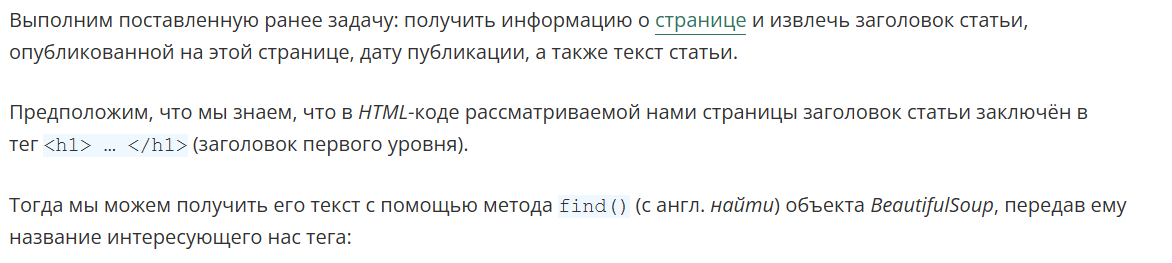

In [1]:
# Применяем метод find() к объекту и выводим результат на экран
print(page.find('h1').text) 

NameError: name 'page' is not defined

?
Но как же узнать, в каких именно тегах заключена необходимая информация?

Проще всего это сделать с помощью так называемого инструмента разработчика, который есть во всех современных браузерах. Покажем, как открыть данный инструмент на примере использования браузера Google Chrome.

Устанавливаем курсор на элементе страницы (заголовок статьи), информацию о котором хотим получить, нажимаем на правую клавишу мыши и в выпадающем списке выбираем пункт «Просмотреть код элемента» или «Исследовать» в зависимости от браузера.

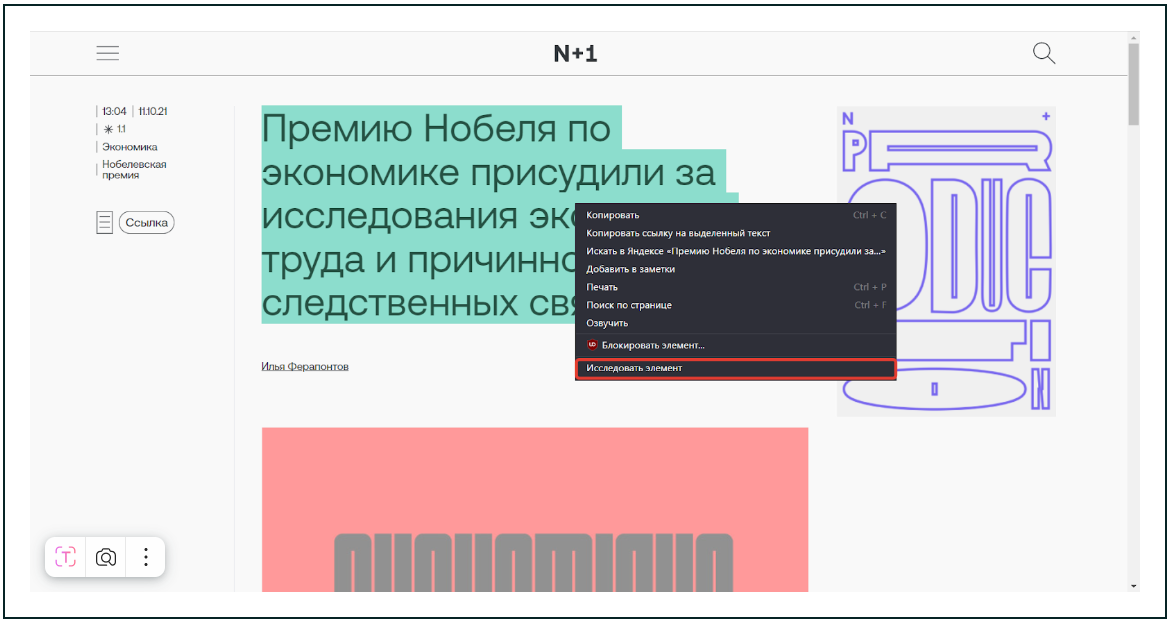

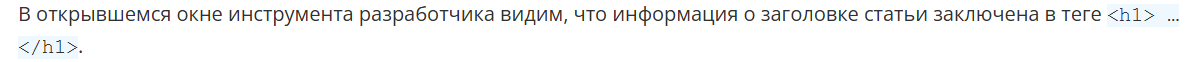

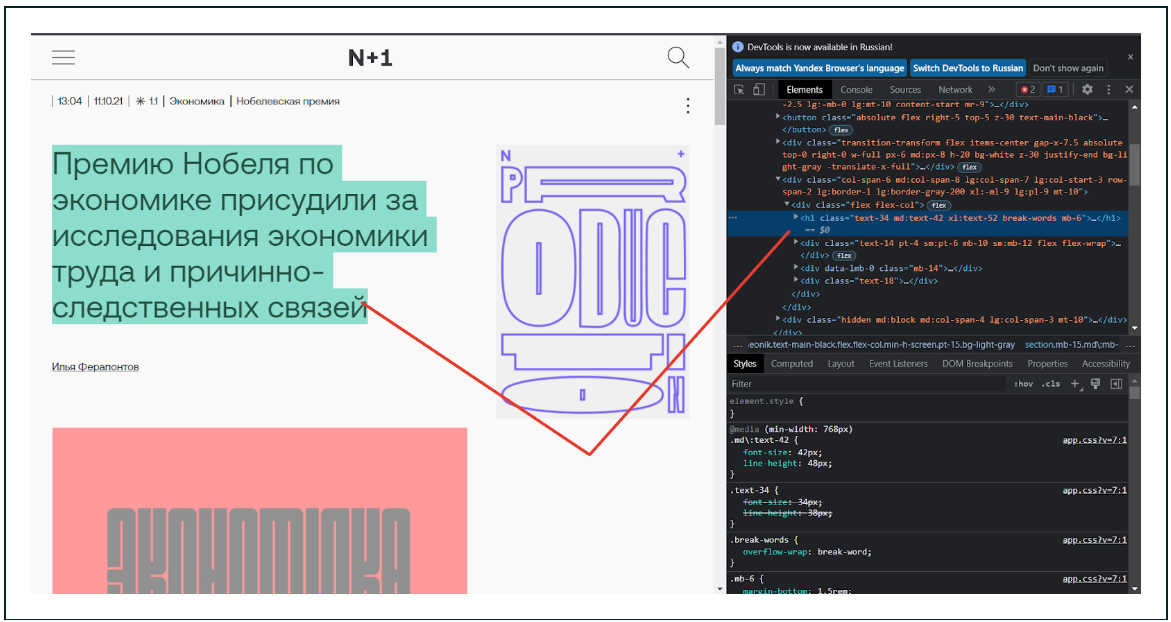

## Неуникальные теги: извлекаем текст и дату публикации статьи ##

Теперь получим сам текст статьи. Как вы уже знаете, первым делом необходимо определить, в какой тег он заключён. Применим, как и ранее, инструмент разработчика.

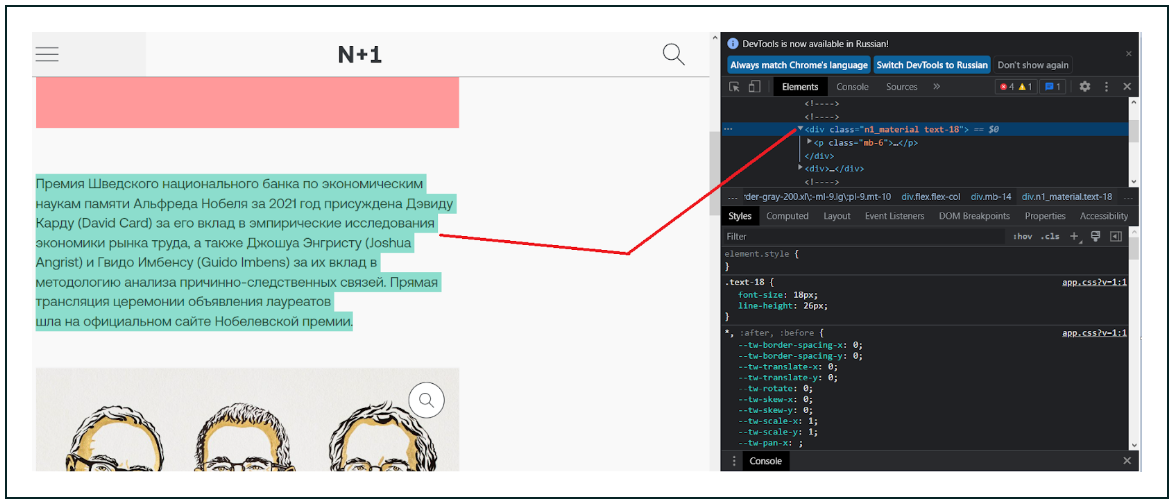

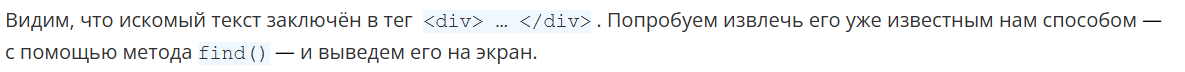

In [4]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title) # Получаем тег title, отображающийся на вкладке браузера
print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

<title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей


In [6]:
print(page.find('div').text) # Выводим содержимое атрибута text тега div

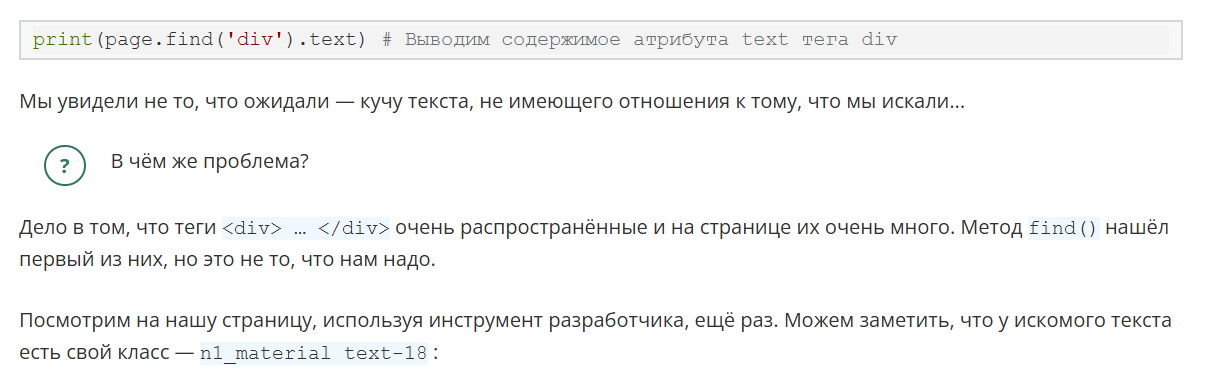

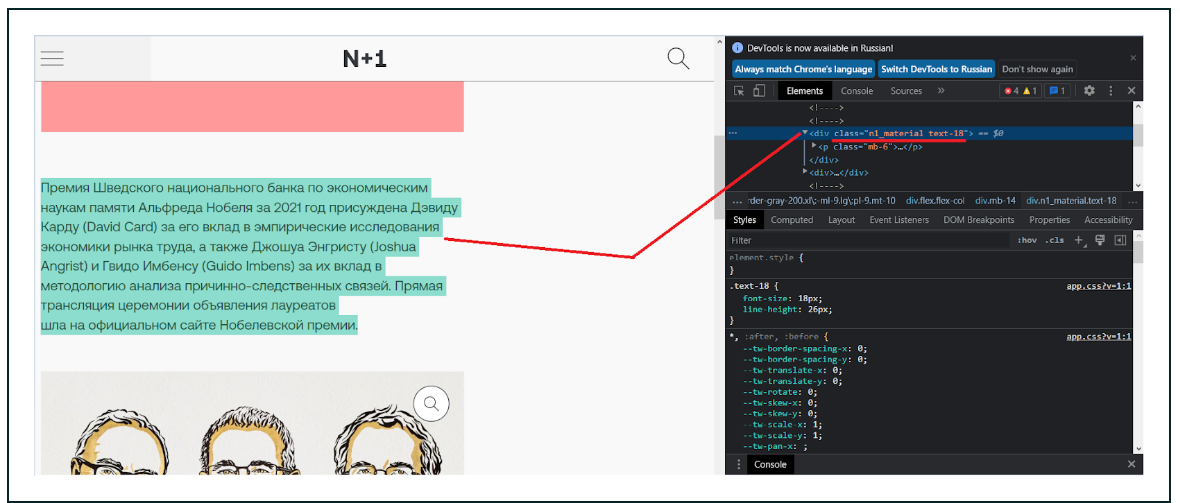

Передадим название класса в метод find() с помощью аргумента class_ и получим текст статьи:

In [7]:
print(page.find('div', class_='n1_material text-18').text) # Выводим содержимое атрибута text тега div класса n1_material text-18

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


В данном случае происходит поиск точного строкового значения class атрибута, т. е. выполнение строк кода:

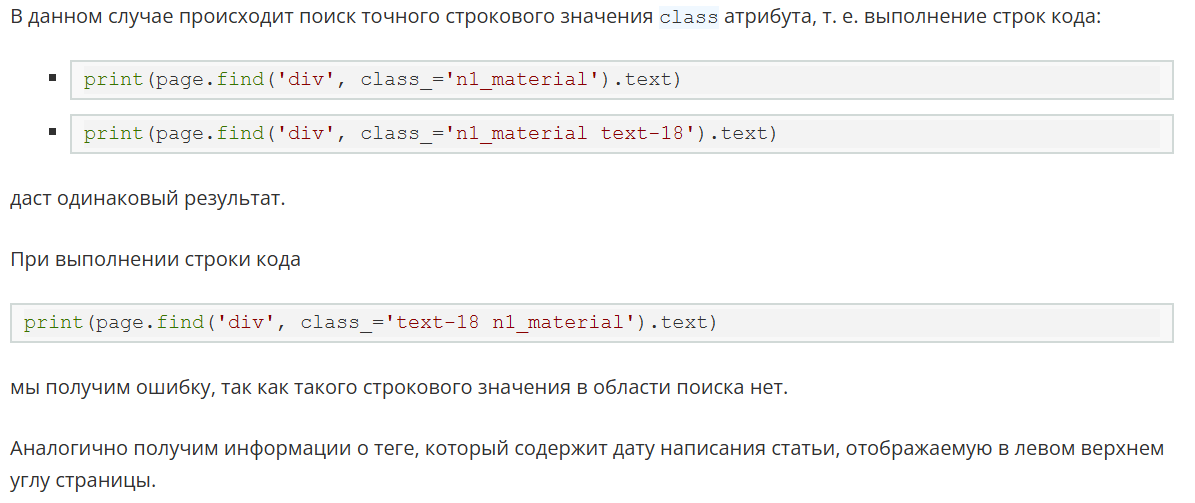

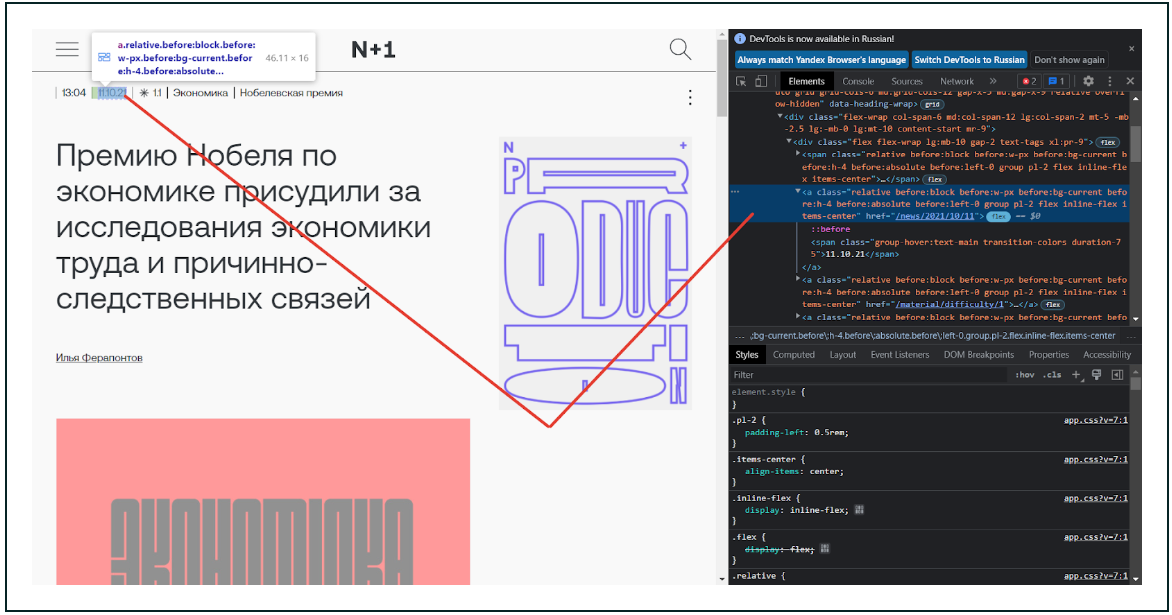

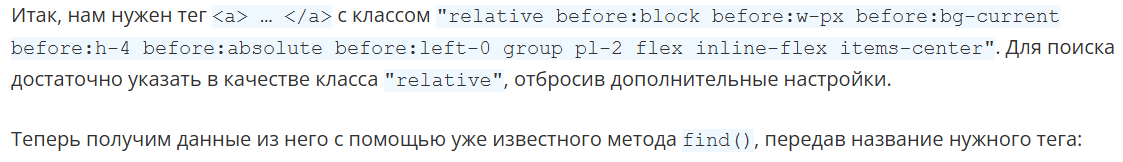

In [8]:
# Выводим на экран содержимое атрибута text тега a с классом "relative"
print(page.find('a', class_= "relative").text)


11.10.21



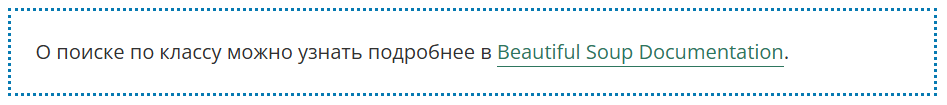

Задача решена — мы извлекли из контента страницы заголовок статьи, опубликованной на странице, дату публикации, а также текст статьи.



## Сбор нескольких элементов: собираем все ссылки на странице ##

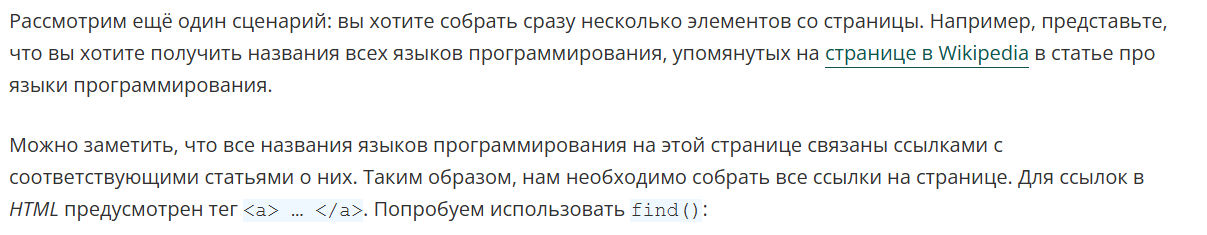

In [12]:
url = 'https://en.wikipedia.org/wiki/List_of_programming_languages' # Задаём адрес ресурса
response = requests.get(url) # Делаем GET-запрос к ресурсу
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
print(page.find('a')) # Ищем ссылку по тегу <a> и выводим её на экран

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>


Мы получили только одну ссылку, хотя на странице их явно больше.

Это происходит, потому что метод find() возвращает только первый подходящий элемент. Если требуется получить больше элементов, необходимо воспользоваться методом find_all() (с англ. найти все):

In [13]:
links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print(len(links)) # Выводим количество найденных ссылок

965


Итак, на момент создания этих учебных материалов на странице содержалось 928 ссылок. Посмотрим на некоторые из них:

In [14]:
print([link.text for link in links[500:510]]) # Выводим ссылки с 500 по 509 включительно

['MAD/I', 'Magik', 'Magma', 'Maple', 'MAPPER', 'MARK-IV', 'Mary', 'MATLAB', 'MASM Microsoft Assembly x86', 'MATH-MATIC']


Не все ссылки соответствуют названиям языков программирования — страница содержит также «служебные» ссылки, такие, например, как Jump to navigation (с англ. Перейти к навигации) или Alphabetical (с англ. По алфавиту):

In [15]:
print([link.text for link in links[0:10]]) # Выводим ссылки с 1 по 9 включительно

['Jump to content', 'Main page', 'Contents', 'Current events', 'Random article', 'About Wikipedia', 'Contact us', 'Help', 'Learn to edit', 'Community portal']


Для обработки полученных данных и исключения «лишней» информации можно, например, использовать подходы, которые вы изучили в модуле PYTHON-14.

✍ В заключение заметим, что BeautifulSoup — достаточно мощная библиотека. Мы рассмотрели её базовые возможности, но их полный список гораздо шире. С ним можно ознакомиться в официальной документации.

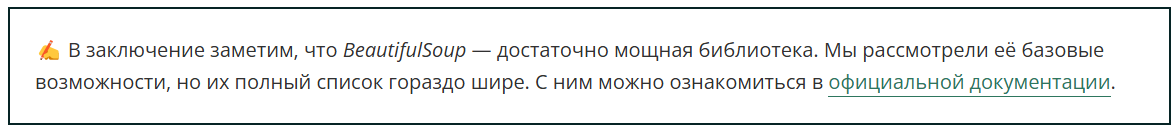

# 6. Работа с API #

✍ В предыдущих разделах мы собирали полезную информацию с различных сайтов.

Вы могли убедиться, что поиск необходимой информации с выделением правильных тегов — довольно трудоёмкая задача. Кроме того, подобные программы могут ломаться в случаях, когда меняется дизайн сайта, его разметка или владельцы сайтов защищаются от ботов капчей.

К счастью, многие крупные сайты предоставляют доступ к так называемым API (англ. Application Programming Interface, рус. Интерфейс Прикладного Программирования).

### API ###
 — это специальные разделы сайта, где информацию можно получать без разметки, а формат запросов и ответов зафиксирован. API созданы для того, чтобы облегчить взаимодействие с сайтом для сторонних разработчиков.

Рассмотрим на примере социальной сети ВКонтакте особенности API, характерные для более крупных сайтов.

### Ключ авторизации ###

Для того чтобы начать работать с API, обычно необходимо получить сервисный ключ авторизации — токен.

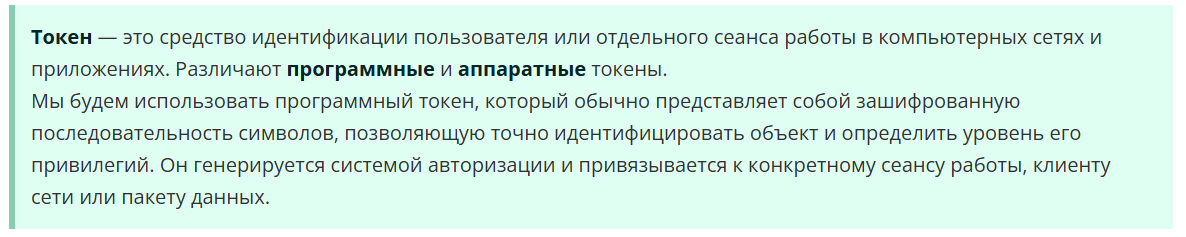

Токен — это средство идентификации пользователя или отдельного сеанса работы в компьютерных сетях и приложениях. Различают программные и аппаратные токены.
Мы будем использовать программный токен, который обычно представляет собой зашифрованную последовательность символов, позволяющую точно идентифицировать объект и определить уровень его привилегий. Он генерируется системой авторизации и привязывается к конкретному сеансу работы, клиенту сети или пакету данных.

Авторизация применяется практически во всех API, чтобы отдавать данные только их владельцу или контролировать количество запросов в единицу времени.

Сервисный токен для API ВКонтакте для нашей задачи создаётся вместе с новым приложением. Приложение мы делать, конечно, не будем. Оно нужно только для получения токена, чтобы сделать необходимые выгрузки.

Зайдите на страницу, чтобы создать приложение (вы должны быть авторизованы ВКонтакте). Дайте приложению любое название, тип и категорию можно не менять:

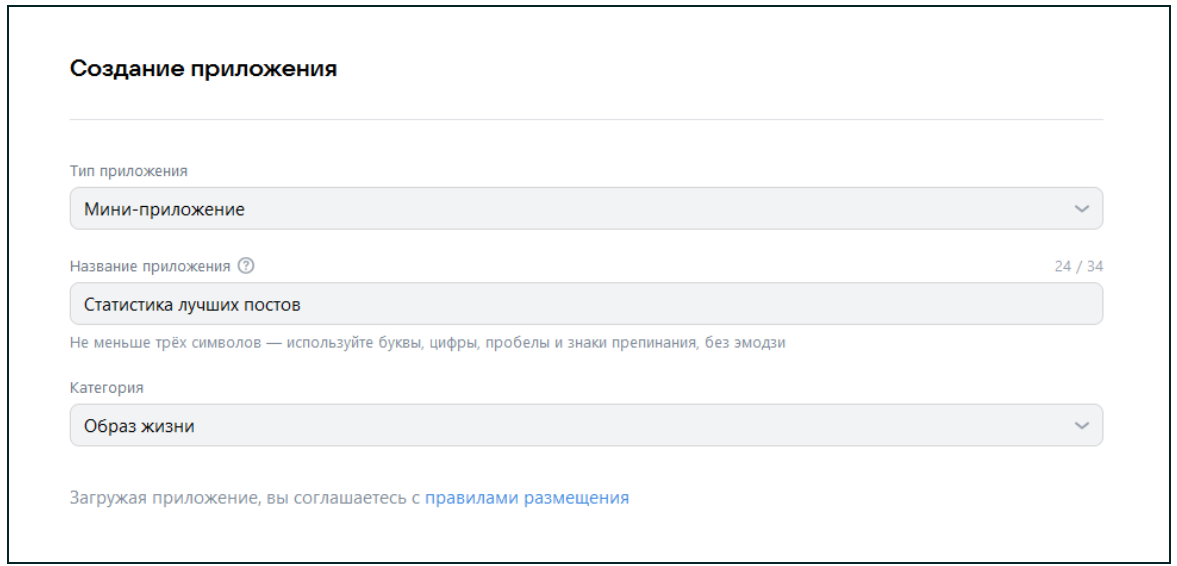

Подтвердив создание приложения на сайте в приложении ВКонтакте или по СМС, выберите на панели слева раздел Разработка и откройте Ключи доступа. Нужный нам токен лежит в поле Сервисный ключ:

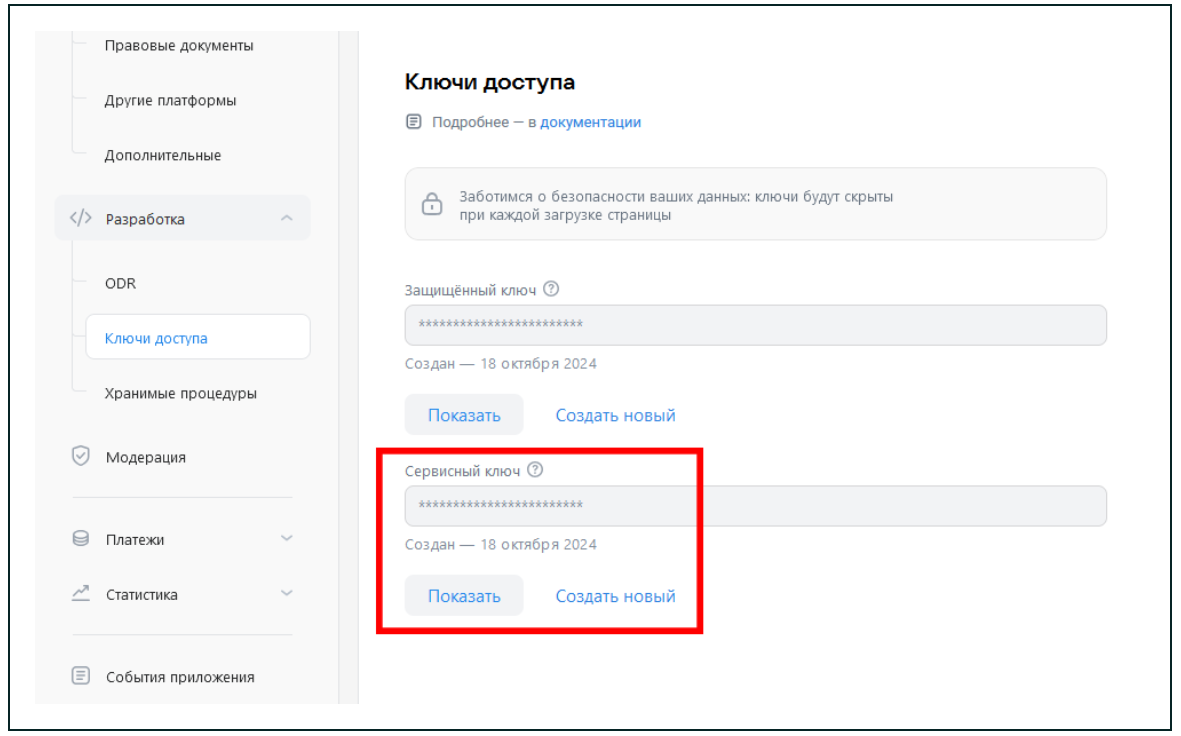

### Первые запросы к API ###

Чтобы познакомиться с работой API, мы будем получать данные для статистических отчётов произвольной группы, например данные о соотношении мужчин и женщин, статистику географии пользователей и т. п.

Сначала рассмотрим работу API на простом примере, на основе которого работают многие системы.

Сделаем наш первый запрос из браузера.

Перейдите по следующей ниже ссылке в браузере, подставив вместо слова TOKEN ваш персональный сервисный ключ доступа (токен), полученный на предыдущем шаге:

#### https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=TOKEN

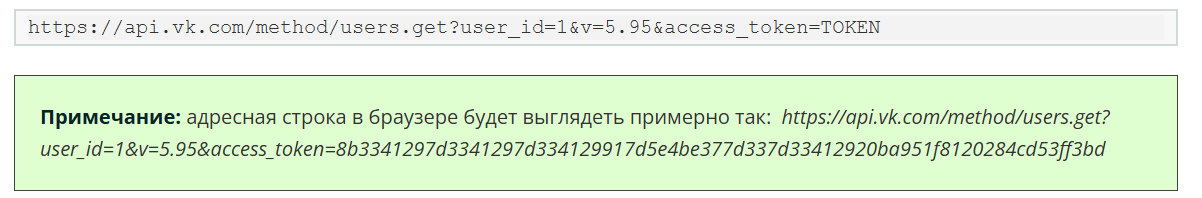

Итак, мы сделали GET-запрос к API ВКонтакте, который состоит из следующих элементов:

- https://api.vk.com/method — домен и URL запроса API; обычно не меняется;
- users.get — название метода, который отдаёт определённый отчёт, в нашем случае это метод для получения информации о пользователе;
- user_id и v — параметры запроса: идентификатор пользователя, о котором хотим получить информацию (в нашем примере мы запрашиваем информацию о первом пользователе), и номер версии API;
- token — токен, который выдаётся только пользователям, имеющим право просматривать определённые данные, например показания счётчиков Яндекс.Метрики вашего проекта; на все остальные запросы без корректного токена система отвечает отказом.

Если мы обратимся к документации метода users.get, то увидим, что в ней описано множество других параметров, которые можно получить о пользователе (дата рождения, пол, родной город и другие) — словом, всё то, что мы видим на странице пользователя в интерфейсе или приложении ВКонтакте (конечно, если пользователь их указал).

Добавим к запросу дату рождения и пол (согласно документации, эти параметры надо перечислять в поле fields):

### https://api.vk.com/method/users.get?user_id=1&v=5.95&fields=sex,bdate&access_token=TOKEN

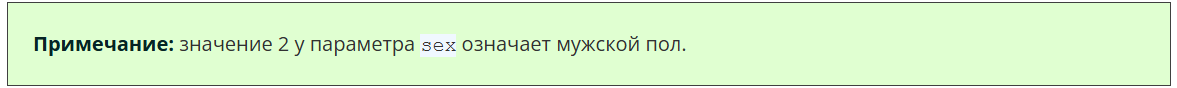

До этого момента мы делали запросы в браузере — теперь давайте выполним запросы из кода.

### Запрос к API из кода

Продолжаем пользоваться всё той же библиотекой requests.

In [27]:
import requests # Импортируем модуль requests
token = 'ad77bc45ad77bc45ad77bc459aae43076baad77ad77bc45c5211598d268556a80f3b224' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
params = {'user_id': 1, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'} # Перечисляем параметры нашего запроса в словаре params
response = requests.get(url, params=params) # Отправляем запрос
print(response.text) # Выводим текст ответа на экран

{"response":[{"id":1,"bdate":"10.10.1984","sex":2,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}


Мы получили строку в JSON-формате, которую можно преобразовать в словарь с помощью метода json(), после чего можно с лёгкостью обращаться к различным полям.



Словари нагляднее выводить с помощью функции pprint(), которую мы уже использовали ранее:

In [28]:
from pprint import pprint # Импортируем функцию pprint()
pprint(response.json()) # Выводим содержимое словаря, содержащего ответ, на экран

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2}]}


Как вы видите, по ключу response мы можем получить список, в котором хранятся словари, содержащие информацию о запрошенных нами пользователях. Мы запросили информацию лишь об одном из них, поэтому список содержит только один элемент. Извлечём его:

In [29]:
user = response.json()['response'][0] # Извлекаем из словаря по ключу response информацию о первом пользователе
print(user['bdate']) # Выводим дату рождения первого пользователя на экран

10.10.1984


Метод users.get() позволяет запрашивать информацию о множестве (до 1 000) пользователей одновременно. Для этого нужно использовать параметр user_ids и передавать id через запятую в строковом формате. Например, чтобы получить информацию о пользователях с id=1, id=2, id=3, необходимо передать значение параметра user_ids='1,2,3'.

Попробуем это сделать:

In [30]:
ids = ",".join(map(str, range(1, 4))) # Формируем строку, содержащую информацию о поле id первых трёх пользователей
params = {'user_ids': ids, 'v': 5.95, 'fields': 'bdate', 'access_token': token, 'lang': 'ru'} # Формируем строку параметров
pprint(requests.get(url, params=params).json()) # Посылаем запрос, полученный ответ в формате JSON-строки преобразуем в словарь и выводим на экран его содержимое, используя функцию pprint()

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров'},
              {'bdate': '14.2',
               'can_access_closed': False,
               'first_name': 'Александра',
               'id': 2,
               'is_closed': True,
               'last_name': 'Владимирова'},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'is_closed': False,
               'last_name': ''}]}


Используя API, определите долю женщин (sex=1) среди пользователей с id от 1 до 500. Иногда будут попадаться пользователи, у которых пол не указан (sex=0), — таких пользователей не нужно учитывать в общем числе.

В ответе укажите число, округлив до двух знаков после точки-разделителя, например, 0.55.

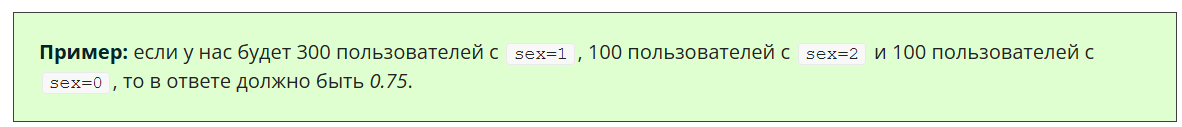

In [31]:
import requests
#token = '...'
url = 'https://api.vk.com/method/users.get'
ids = ",".join(map(str, range(1, 501)))
params = {'user_ids': ids, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'}
response = requests.get(url, params=params).json()['response']
men=women=0
for elem in response:
    if elem['sex'] == 2:
        men+=1
    elif elem['sex'] == 1:
        women+=1
    else:
        continue
print(round(women/(men+women),2))

0.49


### Сбор информации из групп

В одном из предыдущих юнитов в качестве примера мы собрали информацию о небольшом количестве пользователей. Теперь перейдём к более реальной задаче — сбору данных о пользователях группы ВКонтакте.

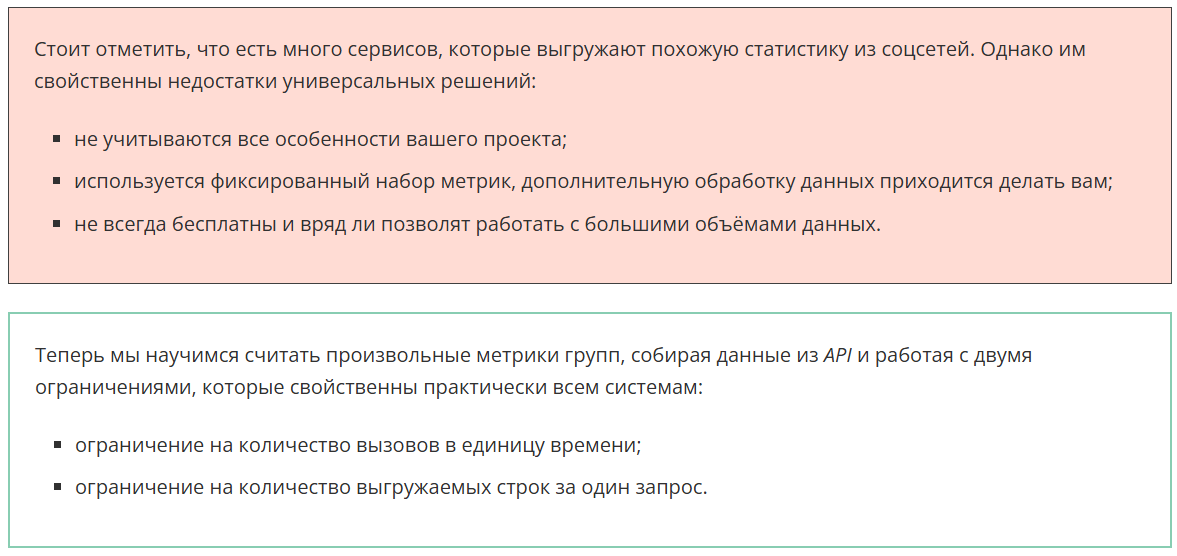

Ограничение на количество запросов в единицу времени сделано для того, чтобы избежать чрезмерной нагрузки на серверы системы. В ряде случаев небольшое количество отчётов можно выгрузить и уложиться в действующий лимит.

Однако второе ограничение не удастся обойти в случае выгрузки больших отчётов. Например, чтобы получить список всех пользователей популярной группы, серверу, возможно, придётся отправить ответ, содержащий миллионы записей.

Давайте рассмотрим, как работать с этими ограничениями на примере выгрузки списка пользователей группы https://vk.com/vk социальной сети ВКонтакте.

Обратимся к документации, чтобы узнать, какие методы нам доступны для групп, — для получения списка пользователей группы доступен метод groups.getMembers.

Согласно документации, обязательным параметром данного метода является group_id — идентификатор, или короткое имя, группы. В нашем случае это vk: https://vk.com/vk. Протестируем, как работает метод в самом простом случае, — получим id участников группы:

In [32]:
import requests # Импортируем модуль requests
#token = ' ... ' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
params = {'group_id': 'vk', 'v': 5.95, 'access_token': token} # Формируем строку параметров
response = requests.get(url, params = params) # Посылаем запрос
data = response.json() # Ответ сохраняем в переменной data в формате словаря
print(data) # Выводим содержимое переменной data на экран (отображён фрагмент)

{'response': {'count': 20296219, 'items': [5, 6, 14, 19, 34, 47, 54, 79, 88, 102, 106, 163, 166, 177, 198, 212, 219, 243, 259, 279, 296, 302, 344, 345, 353, 403, 404, 421, 431, 433, 450, 467, 485, 510, 513, 550, 619, 628, 640, 670, 690, 696, 702, 721, 741, 804, 809, 832, 834, 847, 900, 905, 907, 914, 921, 943, 952, 958, 966, 976, 997, 1000, 1011, 1018, 1023, 1033, 1039, 1058, 1059, 1091, 1097, 1127, 1128, 1131, 1139, 1140, 1159, 1174, 1179, 1181, 1185, 1188, 1207, 1213, 1245, 1270, 1273, 1301, 1322, 1333, 1334, 1351, 1381, 1386, 1388, 1406, 1411, 1418, 1432, 1470, 1490, 1494, 1498, 1503, 1529, 1531, 1550, 1568, 1570, 1575, 1586, 1590, 1593, 1598, 1610, 1615, 1632, 1634, 1635, 1650, 1665, 1674, 1679, 1690, 1697, 1698, 1699, 1700, 1721, 1740, 1745, 1754, 1814, 1818, 1820, 1822, 1829, 1834, 1839, 1840, 1843, 1852, 1858, 1863, 1869, 1887, 1889, 1917, 1925, 1936, 1941, 1943, 1946, 1947, 1955, 1969, 1989, 2019, 2022, 2028, 2030, 2042, 2050, 2051, 2052, 2059, 2069, 2077, 2103, 2136, 2150, 215

По ключу count мы можем получить общее число участников группы, а список по ключу items хранит их id. Посмотрим на него поближе:

In [33]:
print(len(data['response']['items'])) # Выводим на экран количество элементов словаря

1000


Мы видим, что всего пользователей в группе больше 11 миллионов, а получили мы только первую тысячу пользователей группы. По информации, указанной в документации о параметре count, это максимум, который может отдать API за один раз.

Для получения следующей тысячи пользователей можно воспользоваться параметром offset (с англ. смещение), который передвинет начало отсчёта. Для выгрузки всех пользователей группы будем в цикле выгружать по 1000 пользователей (count будет всегда равен 1000), увеличивая смещение offset на величину count.

Для тренировки напишем цикл выгрузки первых 20 пользователей со значением count=5. Иными словами, мы будем выгружать по пять пользователей за запрос до тех пор, пока не получим информацию о 20 пользователях.

Давайте выведем на экран первые 20 пользователей из нашей первой попытки получить информацию о 1000 пользователей, чтобы мы могли сверить результат выгрузки из 20 пользователей:

In [34]:
users_for_checking = data['response']['items'][:20] # Загружаем в переменную информацию об id первых 20 пользователей в виде списка
print(users_for_checking) # Выводим перечень id первых 20 пользователей

[5, 6, 14, 19, 34, 47, 54, 79, 88, 102, 106, 163, 166, 177, 198, 212, 219, 243, 259, 279]


Теперь используем count и offset, чтобы получить те же id по пять за раз:

In [35]:
import requests # Импортируем модуль requests
#token = ' ... ' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
count = 5 
offset = 0 
user_ids = [] 
max_count = 20 
while offset < max_count: 
    # Будем выгружать по count=5 пользователей, 
    # начиная с того места, где закончили на предыдущей итерации (offset) 
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    # Увеличиваем смещение на количество строк, которое мы уже выгрузили 
    offset += count 
print(user_ids) 

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[5, 6, 14, 19, 34, 47, 54, 79, 88, 102, 106, 163, 166, 177, 198, 212, 219, 243, 259, 279]


Сравним списки, полученные двумя способами:

In [36]:
print(user_ids == users_for_checking) 

True


Так как результат сравнения — True, списки идентичны. Значит, второй способ работает корректно. Теперь мы можем получить данные обо всех пользователях, выставив count = 1000 и max_count = data['response']['count'].

### Ограничение по частоте запросов

→ В API часто добавляют ограничение по частоте запросов, чтобы отдельно взятые пользователи слишком сильно не перегружали сервер. Подобное ограничение есть и у ВКонтакте — в документации указано, что можно делать не более трёх запросов в секунду.

Чтобы не следить за частотой отправки запросов с секундомером в руках, мы можем после каждого запроса делать паузу. В этом случае, даже если код будет выполняться на самом быстром компьютере, мы не нарушим установленное ограничение, так как периодичность отправки запросов будет искусственно замедлена.

Воспользуемся библиотекой time и методом sleep, с помощью которого мы можем добавить паузу, например в 0.5 секунд, после каждого запроса:

In [37]:
import requests # Импортируем модуль requests
import time # Импортируем модуль time
#token = ' ... ' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес страницы, к которой делаем запрос
count = 1000 
offset = 0  
user_ids = []  
while offset < 5000: 
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    offset += count 
    print('Ожидаю 0.5 секунды...') 
    time.sleep(0.5) 
print('Цикл завершен, offset =',offset) 

Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Цикл завершен, offset = 5000


### Лайки, репосты и комментарии

Через API новостной ленты ВКонтакте мы можем получить информацию о взаимодействии с сообщениями в ленте.

Для примера продолжим работать с группой https://vk.com/vk и рассмотрим последние 100 сообщений в новостной ленте.

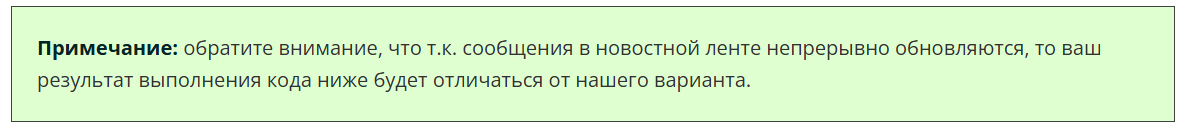

Для получения информации о сообщениях на стене в API ВКонтакте предусмотрен метод wall.get. Применим его:

In [38]:
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()
#token = ' ... ' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/wall.get' # Указываем адрес страницы, к которой делаем запрос
params = {'domain': 'vk', 'filter': 'owner', 'count': 1000, 'offset': 0, 'access_token': token, 'v': 5.95} 
response = requests.get(url, params = params) 
pprint(response.json()) 


{'response': {'count': 844,
              'items': [{'attachments': [{'photo': {'access_key': '68f9efd388309f9c69',
                                                    'album_id': -7,
                                                    'date': 1750427771,
                                                    'id': 457364313,
                                                    'orig_photo': {'height': 1080,
                                                                   'type': 'base',
                                                                   'url': 'https://sun6-21.userapi.com/s/v1/ig2/LGKJCEWtZZlI4-hABbs6eiN_NuufX6UyCdco0z2MSQYfm9x3gnZZUnPbWrHO_-BFYSRSV34_IzpdxcS8SU4L94Ak.jpg?quality=95&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720,1080x1080&from=bu',
                                                                   'width': 1080},
                                                    'owner_id': -22822305,
                              

Посмотрим на количество результатов:

In [39]:
len(response.json()['response']['items'])
## 100

100

Посмотрим на информацию об отдельном сообщении:

In [40]:
response.json()['response']['items'][0] 

{'inner_type': 'wall_wallpost',
 'comments': {'count': 139},
 'marked_as_ads': 0,
 'hash': 'qGTHSKE6FYlIuILnzQ',
 'type': 'post',
 'push_subscription': {'is_subscribed': False},
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1750427771,
    'id': 457364313,
    'owner_id': -22822305,
    'access_key': '68f9efd388309f9c69',
    'sizes': [{'height': 72,
      'type': 's',
      'width': 72,
      'url': 'https://sun6-21.userapi.com/s/v1/ig2/LGKJCEWtZZlI4-hABbs6eiN_NuufX6UyCdco0z2MSQYfm9x3gnZZUnPbWrHO_-BFYSRSV34_IzpdxcS8SU4L94Ak.jpg?quality=95&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720,1080x1080&from=bu&cs=72x0'},
     {'height': 160,
      'type': 'm',
      'width': 160,
      'url': 'https://sun6-21.userapi.com/s/v1/ig2/LGKJCEWtZZlI4-hABbs6eiN_NuufX6UyCdco0z2MSQYfm9x3gnZZUnPbWrHO_-BFYSRSV34_IzpdxcS8SU4L94Ak.jpg?quality=95&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720,1080x1080&

В полях comments, likes и reposts содержится статистика по взаимодействию с сообщением пользователей (на момент получения информации) — число комментариев, лайков и репостов.

Давайте соберём итоговую статистику для последних десяти непустых сообщений в словарь stats. В качестве ключа будем использовать начало сообщения (если начало сообщения пустое, то информацию о таком сообщении проигнорируем), в качестве значения — список с тремя интересующими нас метриками и временем публикации (комментарии, лайки, репосты, дата публикации):

In [41]:
stats = {} 
count_post = 0 # Счётчик «непустых» сообщений
for record in response.json()['response']['items'][:]:
    title = record['text'][:30] 
    if title: 
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date']] 
        count_post += 1 
    if count_post < 10: 
        continue 
    else: 
        break 
pprint(stats)

{'POV: Оставили кота одного с но': [139, 209, 30, 1750427900],
 'Вы приглашены в летний лагерь ': [133, 280, 22, 1750258247],
 'Добрые стикеры ко Дню защиты д': [538, 908, 229, 1748610003],
 'Не знаете, где взять те самые ': [174, 307, 31, 1750349841],
 'Обновляем каналы ВКонтакте — у': [523, 775, 155, 1749563100],
 'Онлайн-диалоги всё чаще начина': [389, 435, 88, 1750064757],
 'Поздравляем с Днём России!\n\nДе': [371, 1567, 48, 1749719520],
 'Редактор историй для сообществ': [266, 677, 184, 1749117242],
 'Сегодня — День русского языка,': [217, 1069, 224, 1749200159],
 'Слово не воробей — вылетит, не': [374, 667, 205, 1748261726]}


Итак, на момент создания учебных материалов десять последних непустых сообщений в группе имели следующую статистику:

Мы рассмотрели базовое взаимодействие с пользователями и группами. ВКонтакте предоставляет достаточно широкие возможности в своём API: всё, что можно делать вручную через браузер, доступно и в API.

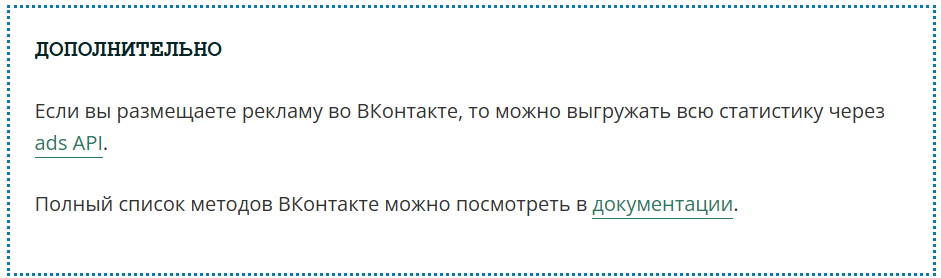

### Другие API

Вы познакомились с интерфейсами прикладного программирования — API (на примере API социальной сети ВКонтакте).

API для разработчиков предоставляют и многие другие платформы. Вот список, пожалуй, самых популярных из них:

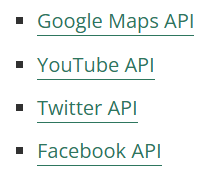

Вы также можете воспользоваться интернет-поиском, указав в поисковой строке, например, «курсы валют API» или «прогноз погоды api», — среди первых результатов выдачи чаще всего с лёгкостью можно найти ссылки на необходимый функционал.

##  7. Как настроить регулярную выгрузку данных

### Скрипты

✍ Как уже говорилось, скриптом принято называть небольшую компьютерную программу, которая автоматизирует выполнение некоторой задачи. Программы, которые мы создаём на языке Python, также являются скриптами.

Скрипт можно использовать разными способами:

- Если вам нужно выполнить код один раз или выполнять его очень редко (от случая к случаю), вы можете запустить скрипт вручную из командной строки.
- Если вы, например, написали на Python серверную часть веб-сайта и хотите, чтобы ваш код мог в любое время обрабатывать запросы, вы захотите запустить его как фоновый процесс.

А что делать, если вам нужно, чтобы ваш скрипт запускался иногда? Каждую пятницу, 13-го? В день рождения супруга (или супруги)? Или просто каждый час?

В этом случае вам нужен автоматический запуск скриптов, или, как часто его называют программисты, запуск по крону — от английского акронима Cron (англ. Command Run ON) — названия системы для автоматического запуска программ и скриптов на сервере в определённое время.

Автоматический запуск может понадобиться, например:

- если вы хотите с определённой периодичностью скачивать новую информацию с сайтов, например выполнять парсинг новостей для последующего анализа (как мы уже знаем, этот процесс называется web-scraping);
- если ваш скрипт должен следить за курсом акций и каждую минуту делать запрос по API, чтобы получить новые котировки;
- если вы написали обучающую платформу и вам нужно каждый час проверять, кто из студентов приступил к занятиям и насколько успешно продвигается их обучение;
- если у вас есть 500 вендинговых автоматов по продаже солнечных очков и каждые пять минут вы должны опрашивать все автоматы, чтобы узнать, не закончились ли очки.

Примеров может быть очень много. В каждом, даже небольшом, проекте обычно есть 5-10 скриптов, которые с определённой периодичностью обновляют сертификаты доменов, очищают место на диске, считают статистику, генерируют отчёты и так далее. Давайте научимся настраивать запуск этих скриптов в соответствии с задачами, которые стоят перед вами.

### Как настроить автоматический запуск

Во всех операционных системах есть встроенные средства запуска программ по расписанию. Однако можно задать расписание запуска необходимых вам функций на языке Python внутри скрипта.

Исполняемый по расписанию код часто называют задачей (англ. task). Для планирования задач в Python есть несколько библиотек, среди которых — популярный и простой в использовании модуль schedule (c англ. расписание). Он позволяет запускать код как с определённым интервалом, так и в заданное время.

Модуль schedule не входит в стандартную библиотеку Python, поэтому его необходимо установить:

In [42]:
# Устанавливаем библиотеку schedule
!pip install schedule 

Для того чтобы у нас появилась возможность использовать модуль в коде, импортируем его:

In [43]:
import schedule # Импортируем модуль schedule

Теперь можно приступать к работе!

### Постановка задачи

Рассмотрим вариант автоматического запуска простой функции, которая выводит на экран короткое сообщение:

In [44]:
def task(): 
    print('Hello! I am a task!') 
    return 

Предположим, что мы хотим, чтобы функция запускалась через определённые интервалы времени, а именно каждые 15 минут.

Для запуска задачи через определённые интервалы времени в модуле schedule используется метод every(), который получает в качестве единственного аргумента число, указывающее, как часто следует запускать код.

Далее вызывается метод, определяющий единицы измерения промежутков времени, через которые будет выполняться функция. В нашем примере это минуты. Вот как будет выглядеть итоговый код:

In [45]:
schedule.every(15).minutes.do(task)

Every 15 minutes do task() (last run: [never], next run: 2025-06-22 13:27:41)

Если бы мы хотели запускать задачу, например, каждый час, то могли бы написать:

In [46]:
schedule.every(1).hour.do(task) 

Every 1 hour do task() (last run: [never], next run: 2025-06-22 14:13:07)

### Выполнение функции

После того как мы создали нашу функцию и определились со временем её запуска, мы можем запустить наш менеджер расписания (schedule). Для этого надо создать бесконечный цикл. Да-да, именно так, ведь скрипт должен выполняться постоянно, чтобы постоянно проверять, не пришло ли время снова выполнить задачу.

Внутри цикла мы будем вызывать особый метод run_pending() для объекта schedule, который будет проверять, нет ли задачи, которую пора выполнить.

После вызова метода run_pending() нужно будет сделать небольшую паузу, после которой можно будет снова проверять, не пришло ли время для выполнения какой-либо функции.

Давайте напишем этот код.

Для создания паузы мы будем использовать метод sleep из модуля time, поэтому наш код начнётся с импорта данного модуля:

In [ ]:
import time 
while True: 
    schedule.run_pending() 
    time.sleep(1) 

Всё готово — теперь можно сохранить файл и выполнить код.

Вот какой код в итоге получился:

In [ ]:
import schedule

def task(): 
    print('Hello! I am a task!') 
    return

schedule.every(15).minutes.do(task)

import time 
while True: 
    schedule.run_pending() 
    time.sleep(1)

Этот код будет каждую секунду проверять, не надо ли выполнить какую-то задачу, и раз в 15 минут будет выводить на экран фразу: "Hello! I am a task!" Вывод сообщения будет повторяться до тех пор, пока вы не остановите выполнение скрипта.